# COGS 108 Final Project - Waitz Library Traffic


## Introduction and Background

As students at UC San Diego we are presented with some obstacles in our weekly responsibility to study and concentrate towards our schoolwork. We have collectively run into anecdotal evidence that a major obstacle for the average UC San Diego student is finding an optimal place to study. Students often need a place to study or work and naturally head to Geisel Library only to find that space is not immediately available and that it may take a substantial chunk of time just to find a chair to sit on. This problem can directly impact a student’s time management, cut down study time and deteriorate their ability to thrive.
    
This obstacle is already being tackled by Geisel Library and companies like Waitz. Geisel Library has created a medium on their website that allows students to book group study rooms and to view which study rooms are currently occupied. This effort mitigates the obstacle of finding a study space for student groups if they are able to reserve a room well in advance. However, this solution does not meet the needs of the average student. It lacks the needed flexibility, on-the-run foresight, and only covers a small fraction of Geisel Library. 

In a further attempt to cover the needs of individual students on a daily basis, Waitz launched an initiative to provide students with an accurate, real time, readily accessible representation of Geisel Library’s “traffic”- or the density of population in the Library’s many spaces. Founded by UCSD alumni, the company’s current goal is to turn this tool into an app available to help students save time and effort in their search for proper study space. By extension, Waitz’s project could substantially promote student success. 

So far, Waitz has developed a website which informs users of the current population in each floor of Geisel Library. In order to meet their goal of limiting human congestion by helping students to navigate library traffic; Waitz must be able to cover more specific areas of Geisel Library and to have a more predictive model of traffic coming to and from its spaces. There are a few factors which may have a direct effect on Geisel Library’s use which may be successful predictors for a predictive model of library traffic. Our COGS108 team has joined Waitz’s efforts by tackling this problem through a short term internship. Our project involves identifying possible correlative factors, quantifying their relationship to library traffic and developing a predictive data-driven model. Waitz will support us by giving us access to their advanced data collection and by mentoring us in the process. A foundational portion of our data analysis includes a dataset with live feed of the library’s population provided by Waitz.

The questions of interest are what trends can we see from the traffic of the library throughout time in a quarter and what external factors influence the traffic?

We have hypotheses relating to external factors such as in the middle of the day and warmer temperature has a positive correlation to a higher population in Geisel. A higher number of people in Geisel when closer to midterms/final weeks (finals probably more). Observation of us UCSD students of seeing a lot of people in the library during this time. Less availability of study rooms and spaces in Geisel indicate that there will be more people in Geisel. There will be a dip in the number of students at Geisel prior to next section of the class.

This question is important because it allows students to efficiently plan their study schedule. This will give them the opportunity to decide whether or not it is worth going to Geisel at a specific time. Since this saves students time from going to UCSD's Libraries, they will be able to focus on their other worries. 

For the Library traffic dataset, Waitz gathers our data through small hardware devices that pick up smartphone signals in the surrounding area. This gives a rough estimate on the number of students at a given location.

### Research Question

Can we predict the traffic in UCSD’s libraries using data encompassing weather, schedule, traffic, and shuttles in these areas? Can we then use a model of library traffic to predict when there is more available library space?

### Hypothesis

UCSD’s library traffic is affected by the weather, timing of exams, class schedules, and shuttle schedules. Therefore, by using data from weather forecasts, class schedules, event calendars, and live shuttle maps, we will predict when the traffic within the library. By extension, this will also allow us to predict when the library will have available study space for those looking to study.

## Group Members:

- A14709564 (Philip La)
    - Contributed to Introduction and Background, Data Description, Data Cleaning/Pre-processing, Data Visualization, Data Analysis and Results, Privacy/Ethics Consideration, Conclusions and Discussion 
- A14782354
- A92120441
- A14697769
- A12297371
- A12753074

## Data Description

- **Dataset Name: Waitz**
- Link to the dataset:
https://drive.google.com/file/d/1uGPgA2lcjtHfPnOkWlTi4CUhu677tHz_/view?usp=sharing
https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping
- Number of observations: (All of last fall quarter + Half of spring quarter quarter) * ~1,000 observations per day

This dataset is given by https://www.ucsdwaitz.com/ and allowed by Professor Voytek as we had to signed legal documents to get access to the full dataset which contains features of time and present signals of Geisel Library, Biomed Library, as well as other venues such as Price Center for 2017 Fall Quarter and 2018 Spring Quarter. The links to the dataset only give a sample of the data as well the full dataset is stored in a database (DynamoDB).

- **Dataset Name: Weather by hour in San Diego Montgomery, CA**
- Link to the dataset: https://drive.google.com/file/d/1AzCrS6SybPOwAXEuSdPDEoDVxWjaRhmb/view?usp=sharing
- Number of observations: 11,000+

This dataset shows the information about the temperature, dew point, and other weather conditions of San Diego Montgomery, CA. This data presents the temperature of the city per hour from the year 2017-current and we scrape all pages through last quarter to this quarter, day by day using this URL format: https://www.wunderground.com/history/airport/KMYF/2018/02/16/DailyHistory.html?req_city=San%20Diego%20Montgomery&req_state=CA&reqdb.zip=92123&reqdb.magic=4&reqdb.wmo=99999.

- **Dataset Name: UCSD Shuttle**
- Link to the dataset: https://drive.google.com/file/d/1JfoZWVrGFwW0ItEqW3eqvkuDr6AEr2qD/view?usp=sharing
- Number of observations: 20,000+

Shows the speed and capacity of each of UCSD's shuttles for the routes they take. The routes are Arriba Shuttle, Mesa Nueva Shuttle, North Campus Shuttle, SIO Shuttle, South Campus Shuttle, and West Campus Connector and we may also include arrival times for each stop as well for a given time.

- **Dataset Name: Scheduling of Classes via time**
- Link to the dataset: https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudent.htm
- Number of observations: 16,000+

For this dataset, we are counting the total number of UCSD students that are taking classes at a certain period of time. This dataset with measure per hour for Fall 2017, Spring 2017, and Winter 2018 and we got this data by scraping the UCSD's schedule of classes website.

We plan to combine these datasets by seeing the correlation between and how these external factors of weather, class schedule and shuttle's data will influence the traffic to Geisel library and possibly other venues as well.

## Data Cleaning/Pre-processing

We first get data from Waitz by querying their database. Then we get weather, shuttle, and schedule of classes by scraping websites.

### Waitz - Geisel Library Traffic

In [29]:
# Database
import requests
import boto3
from boto3.dynamodb.conditions import Key, Attr

# Processing
import numpy as np
import pandas as pd
from pathlib import Path
from functools import reduce
import json
from multiprocessing.dummy import Pool as ThreadPool

# Time
import datetime
import time
import pytz

# Data scrapping 
from bs4 import BeautifulSoup

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import rcParams

In [30]:
# Utility functions

def file_exists(file_name):
    my_file = Path(file_name)
    return my_file.is_file()

def ts_to_dt(ts):
    date, time = ts.split()[0], ts.split()[1]
    month, day, year = [int(x) for x in date.split("/")]
    hour, minute = [int(x) for x in time.split(":")[:2]]
    return datetime.datetime(year, month, day, hour, minute)

def dt_to_ts(dt):
    return dt.strftime('%m/%d/%Y %H:%M')

def start_and_end_dt(day):
    start = dt_to_ts(day + datetime.timedelta(hours=7))
    end = dt_to_ts(day + datetime.timedelta(hours=23, minutes=59))
    return start, end

def merge_dfs(df1, df2):
    if len(df2) == 0:
        return df1
    if len(df1) == 0:
        return df2
    df3 = pd.merge(df1, df2, on='Time_Stamp')
    df3['Present_Signals'] = df3['Present_Signals_x'] + df3['Present_Signals_y']
    return df3[['Time_Stamp', 'Present_Signals']]

In [31]:
# Load and clean Waitz's Geisel data
def get_geisel_data_from_db(earliest, latest, table_selection):
    # get basic info on hubs
    hub_map_url = "https://f3sszy41z4.execute-api.us-west-2.amazonaws.com/testing/get-hub-mapping"
    hubinfo = eval(requests.get(hub_map_url).text)

    # connect to DB
    hps_secdump = boto3.resource('dynamodb').Table(table_selection)

    df = pd.DataFrame(hubinfo)
    df = df.sort_values('Section')
    df = df.drop('DropRSSI',axis=1)

    # dataframe holds only hubs that are in geisel
    df_geisel = df[df['Section'].str.contains("Floor")]
    sections = set(df_geisel['Section'])

    AWS_READ_CAP_UNITS = 200

    """
    Section Dump Export
    """
    now_ts = lambda: datetime.datetime.now(tz=pytz.utc).astimezone(pytz.timezone("US/Pacific"))
    now_dt = lambda: datetime.datetime.now()
    print ("Started at: ", now_ts())
    cell_start = now_dt()
    print ("=======================================")

    section_data = {}

    day = earliest
    unitsconsumed = 0 
    top_counts = {}
    while day <= latest:
        ts = dt_to_ts(day)
        start, end = start_and_end_dt(day)
        dumpstart = now_dt()
        section_data[day] = {}
        print ("\nStarting Section dump for {} ({} days to go)".format(ts, (latest - day).days))

        for section in sections:
            if unitsconsumed >= AWS_READ_CAP_UNITS - 10: # let the cap units rest with buffer space
                time.sleep(1.5)
                unitsconsumed = 0

            resp = hps_secdump.query(
                KeyConditionExpression=Key('Section_Name').eq(section) & Key('Time_Stamp').between(start, end),
                ReturnConsumedCapacity="TOTAL")

            unitsconsumed += resp["ConsumedCapacity"]["CapacityUnits"]

            if resp["ResponseMetadata"]["HTTPStatusCode"] != 200 or "LastEvaluatedKey" in resp:
                print ("{} hub on {} didn't return all items".format(hubinfo["location"], day))
                print ("Current unitsconsumed: {}".format(unitsconsumed))
                print ("items returned: {}".format(resp["Count"]))
                print ("\n\nBefore Breaking: {} Total (successful) Queries".format(queries))
                break

            result = resp["Items"]
            if len(result) > 0:
                section_data[day][section] = pd.DataFrame(result)

        print ("{} dump took {}".format(ts, now_dt() - dumpstart))
        day += datetime.timedelta(days=1)

        print ("=======================================")
        print ("Ended at: ", now_ts())
        print ("Duration: ", now_dt() - cell_start)
    
    return section_data
    
def combiner(earliest, latest, section_data):
    """
    Combine all the sections
    """
    
    print("Starting combiner")

    dfs = []
    pre_dfs = []
    
    pool = ThreadPool(4) 
    
    def reducer(section):
        return reduce(merge_dfs, section, pd.DataFrame(columns=['Time_Stamp', 'Present_Signals']))
    
    day = earliest
    while day <= latest:
        section = section_data[day].values()
        pre_dfs.append(section)
        day += datetime.timedelta(days=1)
    
    dfs = pool.map(reducer, pre_dfs)
    
    geisel_df = pd.concat(dfs)
    geisel_df.index = geisel_df['Time_Stamp'].apply(lambda ts: ts_to_dt(ts))
    return geisel_df[['Present_Signals']]

# 'SectionDump' is for fall quarter 2017 and 'hubplacement-section-dump' is for winter quarter 2018
# 'SectionDump' starts at 2017-9-28 and 'hubplacement-section-dump' starts at 2018-1-10
def get_geisel_df(earliest, latest, table_selection, quarter):
    """Caches geisel data into csv and only updates the cache when earliest or latest is change"""
    geisel_df_file_name = "data/geisel_" + quarter + ".csv"
    geisel_time_file_name = "data/geisel_" + quarter + "_time_last_update.json"
    
    geisel_df = None
    
    if file_exists(geisel_time_file_name) == True:
        d = json.load(open(geisel_time_file_name))
        if earliest != ts_to_dt(d["earliest"]) or latest != ts_to_dt(d["latest"]):
            section_data = get_geisel_data_from_db(earliest, latest, table_selection)
            geisel_df = combiner(earliest, latest, section_data)
            geisel_df.to_csv(geisel_df_file_name)
        
    d = {"earliest": dt_to_ts(earliest), "latest": dt_to_ts(latest)}
    json.dump(d, open(geisel_time_file_name, "w"))
    
    df_geisel = pd.read_csv(geisel_df_file_name)
    
    df_geisel['Time_Stamp'] = pd.to_datetime(df_geisel['Time_Stamp'])
    df_geisel.index = df_geisel['Time_Stamp']
    
    return df_geisel[['Present_Signals']]

#### Fall Quarter 2017

In [32]:
earliest = datetime.datetime(2017, 9, 28)
latest = datetime.datetime(2017, 12, 16)
df_geisel_fall = get_geisel_df(earliest, latest, "SectionDump", "Fall2017")

# keep only the ones that are within +3 to -3 standard deviations
df_geisel_fall = df_geisel_fall[np.abs(df_geisel_fall['Present_Signals']-df_geisel_fall['Present_Signals'].mean())<=(3*df_geisel_fall['Present_Signals'].std())] 

df_geisel_fall.head(10)

,Present_Signals
Time_Stamp,
2017-09-28 11:51:00,355
2017-09-28 11:52:00,355
2017-09-28 11:53:00,348
2017-09-28 11:54:00,375
2017-09-28 13:20:00,318
2017-09-28 13:40:00,352
2017-09-28 13:41:00,339
2017-09-28 13:45:00,300
2017-09-28 13:46:00,299


#### Winter Quarter 2018

In [33]:
earliest = datetime.datetime(2018, 1, 10)
latest = datetime.datetime(2018, 3, 12)
df_geisel_winter = get_geisel_df(earliest, latest, "hubplacement-section-dump", "Winter2018")
df_geisel_winter.head(10)

,Present_Signals
Time_Stamp,
2018-01-10 13:39:00,773
2018-01-11 14:09:00,782
2018-01-11 14:12:00,787
2018-01-11 14:14:00,799
2018-01-11 14:16:00,794
2018-01-11 14:18:00,828
2018-01-11 14:20:00,836
2018-01-11 14:22:00,862
2018-01-11 14:24:00,844


### Getting weather data using JavaScript

Scraping the data from wunderground and saving it to a csv file.

```javascript
const fs = require('fs');
const axios = require('axios');
const cheerio = require('cheerio');
const async = require('async');

//let fileName = 'test10.csv';
let fileName = 'weather.csv';
let writeStream = fs.createWriteStream(fileName);
const header_link = getLink(2017, 2, 11);
let start = new Date('01/01/2017');
//let end = new Date('01/03//2017');
let end = new Date('02/09//2018');

writeStream.write('Day,');

const HeaderColumn = ['Time (PST)', 'Temp.', 'Dew Point', 'Humidity',
      'Pressure', 'Visibility', 'Wind Dir', 'Wind Speed', 'Conditions'];

// set the header
function getHeader(cb) {
  axios.get(header_link)
  .then((response) => {
    const $ = cheerio.load(response.data)
    let headers = ''
    $('#obsTable th').each(function(i, elem) {
      let text = $(this).text();

      if (HeaderColumn.indexOf(text) < 0) return;

      if (text == 'Temp.') text = 'Temp';

      headers += text + ','
    })
    headers = headers.substring(0, headers.length - 1) + '\n'
    writeStream.write(headers);
    cb();
  })
  .catch(error => {
    console.error(error)
    cb();
  })
}

function getLink(year, month, day) {
  return 'https://www.wunderground.com/history/airport/KMYF/' + year + '/' + month + '/' + day + '/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo='
}

function getDay(year, month, day) {
  return month + '/' + day + '/' + year;
}

let index = 1

let requests = []


while(start < end){
  var newDate = start.setDate(start.getDate() + 1);
  start = new Date(newDate);

  let year = start.getFullYear()
  let month = start.getMonth()+1
  let day = start.getDate()

  requests.push(getPageRows(getLink(year, month, day), getDay(year, month, day)))
}

function getCurrentPageHeaders($) {
  let Headers = [];
  $('#obsTable th').each(function(i, elem) {
    Headers.push($(this).text());
  })
  return Headers;
}

function getPageRows(link, date) {
  return function (cb) {
    axios.get(link)
    .then((response) => {

      console.log('Getting ' + index++ + ' out of ' + requests.length + ' on ' + date)

      const $ = cheerio.load(response.data)

      const Columns = getCurrentPageHeaders($);

      let body = '';
      $('.no-metars').each(function(i, elem) {
        line = date;
        $(this).find('td').each(function(i, elem) {
          if (Columns.length == 12)
          {
            if (i >= 8 && i <= 10) return;
          }
          else
          {
            if (i == 2) return;
            if (i >= 9 && i <= 11) return;
          }

          line += ',' + $(this).text()
        })
        line = line.replace(/(?:\r\n|\r|\n)/g, ' ');
        writeStream.write(line + '\n');
        body += line + '\n'
      })
      cb();
    })
    .catch(error => {
      cb();
      index++
    })
  }
}

async.series([
  function (cb) {
    getHeader(cb);
  }
].concat(requests), function() {
  console.log('Done!');
  writeStream.close();
})
```

In [35]:
df_weather_2017 = pd.read_csv('data/weather_2017.csv')
df_weather_2017.index = pd.to_datetime(df_weather_2017['Day'] + " " +  df_weather_2017['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather_2017 = df_weather_2017.loc['2017-09-28':'2017-12-16']
df_weather_2017 = df_weather_2017[df_weather_2017.columns[2:]]
df_weather_2017['Temp'] = df_weather_2017['Temp'].apply(lambda s: s[:-3].strip())
df_weather_2017['Temp'] = pd.to_numeric(df_weather_2017['Temp'])
df_weather_2017.head()

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2017-09-28 12:53:00,66.0,60.1 °F,81%,29.92 in,10.0 mi,Calm,Calm,Clear
2017-09-28 01:53:00,64.0,59.0 °F,84%,29.91 in,9.0 mi,ESE,4.6 mph,Partly Cloudy
2017-09-28 02:53:00,63.0,60.1 °F,90%,29.89 in,5.0 mi,ESE,4.6 mph,Clear
2017-09-28 03:53:00,64.0,57.9 °F,80%,29.88 in,8.0 mi,Calm,Calm,Clear
2017-09-28 04:53:00,63.0,57.0 °F,81%,29.88 in,9.0 mi,West,4.6 mph,Clear


In [37]:
df_weather_2018 = pd.read_csv('data/weather_2018.csv')
df_weather_2018.index = pd.to_datetime(df_weather_2018['Day'] + " " +  df_weather_2018['Time (PST)'], format='%m/%d/%Y %H:%M %p')
df_weather_2018 = df_weather_2018[df_weather_2018.columns[2:]]
df_weather_2018['Temp'] = df_weather_2018['Temp'].apply(lambda s: s[:-3].strip())
df_weather_2018['Temp'] = pd.to_numeric(df_weather_2018['Temp'])
df_weather_2018.head()

,Temp,Dew Point,Humidity,Pressure,Visibility,Wind Dir,Wind Speed,Conditions
2018-01-11 12:53:00,55.9,51.1 °F,84%,30.13 in,10.0 mi,NNE,5.8 mph,Clear
2018-01-11 01:53:00,55.0,48.9 °F,80%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 02:53:00,55.0,48.9 °F,80%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 03:53:00,54.0,48.9 °F,83%,30.14 in,10.0 mi,Calm,Calm,Clear
2018-01-11 04:53:00,52.0,48.0 °F,86%,30.16 in,10.0 mi,NE,3.5 mph,Clear


#### UCSD's Class Schedule

We have scrapped UCSD's class schedule data using BeautifulSoup module to visualize it with Geisel's foot traffic data. The scrapping code is shown below: 

In [13]:
#Scraping the Scheduling DATA
QUERY_TERMS = ['SP18', 'WI18']
QUERY_DEPTS = ['AIP', 'AWP', 'ANBI', 'ANAR', 'ANTH', 'ANSC', 'BENG', ' BIEB', 'BICD', 'BIPN', 'BIBC', 'BILD', 'BIMM', 'BISP', 'CENG', 'CHEM', 'CHIN', 'COGS', 'COMM', 'CSE', 'ICAM', 'CONT','CGS', 'CAT', 'TDDM', 'TDHD', 'TDMV', 'TDTR', 'DSC', 'DSGN', 'DOC', 'ECON', 'EDS', 'ERC', 'ECE','ENG', 'ENVR', 'ESYS', 'ETHN', 'EXPR', 'FMPH', 'FILM', 'HITO', 'HIEA', 'HIEU', 'HILA', 'HISC', 'HINE', 'HIUS', 'HILD','HDP', 'HUM', 'INTL', 'JAPN', 'JUDA', 'LATI', 'LIAB', 'LIDS', 'LIGN',  'LIHL', 'LIIT', 'LIPO', 'LISP','LISP', 'LTFR', 'LTGM', 'LTIT', 'LIFR', 'LTKO','LTLA', 'LTRU', 'LTSP', 'LTWR', 'LTEN', 'LTWL', 'LTEA', 'MMW', 'MATH',  'MAE','MCWP', 'MUS', 'NANO', 'PHIL', 'PHYS', 'POLI', 'PSYC', 'RELI', 'REV', 'SOCE', 'SOCI', 'SE', 'TDAC','TDDE', 'TDDR', 'TDGE', 'TDHT', 'TDPW', 'TWS', 'TMC', 'USP', 'VIS', 'WARR', 'WCWP']

def get_soup(dept='CSE', term='SP18', page='1'):
    """
    Return a soup object with given dept, term, and page.  
    """
    parameters = 'selectedTerm='+term+'&xsoc_term=&loggedIn=false&tabNum=&selectedSubjects='+dept+'&_selectedSubjects=1&schedOption1=true&_schedOption1=on&_schedOption11=on&_schedOption12=on&schedOption2=true&_schedOption2=on&_schedOption4=on&_schedOption5=on&_schedOption3=on&_schedOption7=on&_schedOption8=on&_schedOption13=on&_schedOption10=on&_schedOption9=on&schDay=M&_schDay=on&schDay=T&_schDay=on&schDay=W&_schDay=on&schDay=R&_schDay=on&schDay=F&_schDay=on&schDay=S&_schDay=on&schStartTime=12%3A00&schStartAmPm=0&schEndTime=12%3A00&schEndAmPm=0&_selectedDepartments=1&schedOption1Dept=true&_schedOption1Dept=on&_schedOption11Dept=on&_schedOption12Dept=on&schedOption2Dept=true&_schedOption2Dept=on&_schedOption4Dept=on&_schedOption5Dept=on&_schedOption3Dept=on&_schedOption7Dept=on&_schedOption8Dept=on&_schedOption13Dept=on&_schedOption10Dept=on&_schedOption9Dept=on&schDayDept=M&_schDayDept=on&schDayDept=T&_schDayDept=on&schDayDept=W&_schDayDept=on&schDayDept=R&_schDayDept=on&schDayDept=F&_schDayDept=on&schDayDept=S&_schDayDept=on&schStartTimeDept=12%3A00&schStartAmPmDept=0&schEndTimeDept=12%3A00&schEndAmPmDept=0&courses=&sections=&instructorType=begin&instructor=&titleType=contain&title=&_hideFullSec=on&_showPopup=on'
    page_source = requests.get('https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudentResult.htm?page='+page+'&'+parameters)
    return BeautifulSoup(page_source.content, 'html.parser')

def get_time(dept='CSE', term='SP18'):
    page = 1
    soup = get_soup(dept,term, str(page))
    time_list = []
    availability = []
    capacity = []

    while 'Error report' not in soup.html.head.title.text:
        for first in soup.find_all(True, {'class': 'sectxt'}):
            stuff = first.find_all(True,{'class': 'brdr'})
            if len(stuff) > 6 and '\n' not in stuff[6] and len(stuff) > 10 and "ertext" not in str(stuff[10]):
                time_list += stuff[6]
                availability += stuff[10]
                capacity += stuff[11]
                
        page += 1
        soup = get_soup(dept, term, str(page))
    people = [0 for i in range(len(availability))]
    
    for i in range(len(capacity)):
        if(str(availability[i]) != "Unlim" and int(availability[i]) <= int(capacity[i])):
            people[i] = int(int(capacity[i]) - int(availability[i]))
        else:
            people[i] = int(capacity[i])

    return people, time_list

def splitTimes(timeOfCourse = ["stuff"]):
    start_time = ["" for _ in range(len(timeOfCourse))]
    end_time = ["" for _ in range(len(timeOfCourse))]
    
    for i in range(len(timeOfCourse)):
        start_time[i] = timeOfCourse[i].split("-")[0]
        end_time[i] = timeOfCourse[i].split("-")[1]
    return start_time, end_time

def updateTime(timeList = [4]):
    for i in range(len(timeList)):
        if timeList[i].endswith("p") and timeList[i][1] == ":": 
            if timeList[i][:2].endswith(":"):
                timeList[i] = str(int(timeList[i][:1]) + 12) + ":" + timeList[i][2:4]
            else:
                timeList[i] = str(int(timeList[i][:2]) + 12) + ":" + timeList[i][3:5]
    return timeList

def takeEndSymbol(timeList = []):
    for i in range(len(timeList)):
        if timeList[i].endswith("a") or timeList[i].endswith("p"):
            timeList[i] = timeList[i][:-1]
    return timeList

def convertToDouble(time = []):
    for i in range(len(time)):
        temp = time[i].split(":")
        data = float(temp[0]) + (float(temp[1])/100)*(5.0/3.0)
        time[i] = data
    return time


def getAll(quarter, name):
    people_total = []
    beg_total = []
    end_total = []
    for i in QUERY_DEPTS:
        people, time_list = get_time(i, quarter)
        beg = []
        end = []
        beg, end = splitTimes(time_list)
        #if p, then adds 12 
        newBeg = updateTime(beg)
        newEnd = updateTime(end)
        #take away the a and p at end
        newBeg = takeEndSymbol(newBeg)
        newEnd = takeEndSymbol(newEnd)
        #convert to double
        newBeg = convertToDouble(newBeg)
        newEnd = convertToDouble(newEnd)
        people_total += people
        beg_total += newBeg
        end_total += newEnd
    d = {'size': people_total, 'start_time':beg_total, 'end_time':end_total}
    df = pd.DataFrame(d)
    df = df[['start_time', 'end_time', 'size']]
    df.to_csv(name, sep='\t')

In [19]:
# Here we show how our scrapped schedule looks like 
sample_schedule_df = pd.read_csv('data/Fall_2017_class_size_and_time.csv')
sample_schedule_df[10:15]

,start_time end_time dayOfWeek size
10,10\t11.0\t12.333333333333334\tMW \t14
11,11\t12.5\t13.833333333333334\tTuTh \t13
12,12\t12.5\t13.833333333333334\tTuTh \t13
13,13\t14.0\t15.333333333333334\tMW \t14
14,14\t14.0\t15.333333333333334\tTuTh \t13


From the sample above, we can see that the format is very messy. The format can not be easily visuzlied or used to find its correlation with Geisel's foot traffic data, in which one of its column is the start time of classses, another column is the day of the week, another column is the end time of classes and the last column is the number of students in class between the start time and end time. However, since many classes start and end at the same time, there is a lot of duplicates in the data. As a result, we have decided to change it into five different datasets which have better format for future use. The five datasets are for each day of the weekly respectively. And for each day, one of the column counts from 00:00 A.M. to 23:55 A.M. of a day for every 5 minutes. And the other column would be the number of students in class during the 5-minutes period. 

In [4]:
# Functions below clean, process and convert the time format into datetime. 
def TwentyFourToTwelve(TwentyFour):
    hour = TwentyFour*100
    minute = int((hour%100)*(3.0/5.0))
    hour /= 100
    hour = int(hour)
    minute = str(minute)
    if minute == "0":
        minute += "0"
    
    
    if hour > 12:
        hour -= 12
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 12:
        return str(hour) + ":" + str(minute) +" pm"
    elif hour == 0:
        return "12" + ":" + str(minute) +" am"
    else:
        return str(hour) + ":" + str(minute) +" am"
    
def clean_time_format(time):
    is_morning = True
    if 'pm' in time and '12' not in time: 
        is_morning = False
        
    time = time.replace('am', '')
    time = time.replace('pm', '')
    time = time.strip() 
    time += ':00'
    
    time_arr = time.split(':')
    if not is_morning:
        time_arr[0] = str(int(time_arr[0]) + 12)  
    
    if '9' in time_arr[1]:
        time_arr[1] = str(int(time_arr[1]) + 1)
        
    result_str = ""
    for num in time_arr:
        result_str += num + ":"
    
    result_str = result_str[:-1]
    
    return result_str

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%H:%M:%S")

In [5]:
# This cell is responsible for processing data from the old dataframe.
df = pd.read_csv('data/Fall_2017_class_size_and_time.csv', sep='\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['start_time'] = df['start_time'].apply(TwentyFourToTwelve)
df['end_time'] = df['end_time'].apply(TwentyFourToTwelve)
df.columns = ['start_time', 'end_time', 'day_of_week', 'number_of_people']
df['start_time'] = df['start_time'].apply(clean_time_format)
df['end_time'] = df['end_time'].apply(clean_time_format)
df['start_time'] = df['start_time'].apply(transform_datetime)
df['end_time'] = df['end_time'].apply(transform_datetime)

time_interval_arr = [] 
start_time_m = []
end_time_m = [] 
num_ppl_m = []
start_time_t = []
end_time_t = []
num_ppl_t = []
start_time_w = []
end_time_w = []
num_ppl_w = []
start_time_r = []
end_time_r = []
num_ppl_r = []
start_time_f = []
end_time_f = []
num_ppl_f = []

for idx, row in df.iterrows(): 
    if 'M' in row['day_of_week']:
        start_time_m.append(row['start_time'])
        end_time_m.append(row['end_time'])
        num_ppl_m.append(row['number_of_people'])
    if 'Tu' in row['day_of_week']:
        start_time_t.append(row['start_time'])
        end_time_t.append(row['end_time'])
        num_ppl_t.append(row['number_of_people'])
    if 'W' in row['day_of_week']:
        start_time_w.append(row['start_time'])
        end_time_w.append(row['end_time'])
        num_ppl_w.append(row['number_of_people'])
    if 'Th' in row['day_of_week']:
        start_time_r.append(row['start_time'])
        end_time_r.append(row['end_time'])
        num_ppl_r.append(row['number_of_people'])
    if 'F' in row['day_of_week']:
        start_time_f.append(row['start_time'])
        end_time_f.append(row['end_time'])
        num_ppl_f.append(row['number_of_people'])

df_m = pd.DataFrame()
df_m['start_time'] = start_time_m
df_m['end_time'] = end_time_m
df_m['number_of_people'] = num_ppl_m

df_t = pd.DataFrame()
df_t['start_time'] = start_time_t
df_t['end_time'] = end_time_t
df_t['number_of_people'] = num_ppl_t

df_w = pd.DataFrame()
df_w['start_time'] = start_time_w
df_w['end_time'] = end_time_w
df_w['number_of_people'] = num_ppl_w

df_r = pd.DataFrame()
df_r['start_time'] = start_time_r
df_r['end_time'] = end_time_r
df_r['number_of_people'] = num_ppl_r

df_f = pd.DataFrame()
df_f['start_time'] = start_time_f
df_f['end_time'] = end_time_f
df_f['number_of_people'] = num_ppl_f

current_time = datetime.datetime(1900, 1, 1)
end_time = datetime.datetime(1900, 1, 2)

sum_m = [] 
sum_t = []
sum_w = []
sum_r = []
sum_f = []

while current_time != end_time: 
    sum = 0
    for idx, row in df_m.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_m.append(sum) 
    sum = 0
    
    for idx, row in df_t.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_t.append(sum)
    sum = 0
    
    for idx, row in df_w.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_w.append(sum) 
    sum = 0
    
    for idx, row in df_r.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_r.append(sum) 
    sum = 0
    
    for idx, row in df_f.iterrows():
        if current_time >= datetime.datetime.strptime(str(row['start_time']), '%Y-%m-%d %H:%M:%S') and current_time <= datetime.datetime.strptime(str(row['end_time']), '%Y-%m-%d %H:%M:%S'):
            sum += row['number_of_people']
            
    sum_f.append(sum) 
    sum = 0
    
    current_time += datetime.timedelta(minutes=5)

In [35]:
# This cell is responsible for creating the new dataframes from processed data, and 
# we export them in to csv files.
time_interval = pd.date_range("1900-01-01 00:00:00", "1900-01-01 23:55:00", freq="5min")
new_df_m = pd.DataFrame()
new_df_m['Time_Stamp'] = time_interval
new_df_m['Number_of_People'] = sum_m

new_df_t = pd.DataFrame()
new_df_t['Time_Stamp'] = time_interval
new_df_t['Number_of_People'] = sum_t

new_df_w = pd.DataFrame()
new_df_w['Time_Stamp'] = time_interval
new_df_w['Number_of_People'] = sum_w

new_df_r = pd.DataFrame()
new_df_r['Time_Stamp'] = time_interval
new_df_r['Number_of_People'] = sum_r

new_df_f = pd.DataFrame()
new_df_f['Time_Stamp'] = time_interval
new_df_f['Number_of_People'] = sum_f

new_df_m.to_csv('data/monday_class_schedule.csv')
new_df_t.to_csv('data/tuesday_class_schedule.csv')
new_df_w.to_csv('data/wednesday_class_schedule.csv')
new_df_r.to_csv('data/thursday_class_schedule.csv')
new_df_f.to_csv('data/friday_class_schedule.csv') 

# And here we show a sample of our newly formatted dataframe to 
# give a sense of how it looks like. Notice that the date 1900-01-01
# is a dummy date that Python generates automatically, so it does not have 
# any meaning. 
new_df_m[115:120]

,Time_Stamp,Number_of_People
115,1900-01-01 09:35:00,1316
116,1900-01-01 09:40:00,1316
117,1900-01-01 09:45:00,1316
118,1900-01-01 09:50:00,1316
119,1900-01-01 09:55:00,165


After we have processed and converted the schedule data into five different nicely formatted dataframes for each day of the week. We will also need to process and convert Geisel's foot traffic in the same format so that we can compare and visualize schedule data with it. The Geisel data is given as the present signal at some random time stamp every few minutes. We would like to also count the present signal for every 5 minutes throughout the day. Since we have foot traffic data for every day throughout the quarter. We will need to take the average of the data to convert them into different data frames for week day of the week as well. And the code for processing the data is shown below: 

In [21]:
# This cell shows the functions used 
def get_index_dictionary():
    """
    This function returns a dictionary which its key is time interval
    and value is the corresponding index. 
    """
    index_dictionary = {}
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    index = 0
    while current_time != end_time:
        index_dictionary[str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)] = index 
        index += 1
        current_time += datetime.timedelta(minutes=5)
    return index_dictionary

def transform_datetime(time):
    return datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

def get_key(datetime):
    return str(current_time.hour)+':'+str(current_time.minute)+':'+str(current_time.second)

def get_time_interval_df():
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    time = []
    while current_time != end_time:
        time.append(current_time)
        current_time += datetime.timedelta(minutes=5)
    return time

def get_machine_start_time(series):
    current_time = datetime.datetime(1900, 1, 1)
    end_time = datetime.datetime(1900, 1, 2)
    find_signal = False
    row_idx = 0
    while not find_signal: 
        if int(series[row_idx]) > 0 or current_time == end_time:
            find_signal = True
            break
        current_time += datetime.timedelta(minutes=5)
        row_idx += 1
    return current_time 

In [23]:
# This cell is responsible to sum the present signal and count the sums 
# so that we can take their average for each day of the week. 
# This cell takes a long time to run. (~ a couple of minutes)
df = pd.read_csv('data/geisel_Fall2017.csv')
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df['Week_Day'] = df['Time_Stamp'].dt.weekday
# df.index = pd.to_datetime(df['Time_Stamp'])
# df = df.resample('5T').mean()
df = df.dropna()

current_time = datetime.datetime(2017, 9, 28)
end_time = datetime.datetime(2017, 12, 17)
row_idx = 0 

index_dictionary = get_index_dictionary()

sums = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)
counts = np.array([np.zeros(len(index_dictionary))]*7, dtype=float)

while current_time != end_time:
    if current_time == datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'):
        day_idx = int(df.iloc[row_idx]['Week_Day'])
        corr_idx = index_dictionary[get_key(current_time)]
        sums[day_idx][corr_idx] += df.iloc[row_idx]['Present_Signals']
        counts[day_idx][corr_idx] += 1 
        row_idx += 1 
        current_time += datetime.timedelta(minutes=5)
    elif current_time < datetime.datetime.strptime(str(df.iloc[row_idx]['Time_Stamp']), '%Y-%m-%d %H:%M:%S'): 
        current_time += datetime.timedelta(minutes=5)
    else:
        row_idx += 1

In [26]:
# This cell is reponsible for creating the new dataframes 
avgs = np.divide(sums, counts, out=np.zeros_like(sums), where=counts!=0)
avgs = avgs.astype(int)
time_df = get_time_interval_df() 
xfmt = mdates.DateFormatter('%H:%M')

df_geisel_m = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_m['Present_Signals'] = avgs[0]
df_geisel_t = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_t['Present_Signals'] = avgs[1]
df_geisel_w = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_w['Present_Signals'] = avgs[2]
df_geisel_r = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_r['Present_Signals'] = avgs[3]
df_geisel_f = pd.DataFrame({'Time_Stamp': time_df})
df_geisel_f['Present_Signals'] = avgs[4]

# And here we export them into csv files 
df_geisel_m.to_csv('data/geisel_monday_average_2017.csv')
df_geisel_t.to_csv('data/geisel_tuesday_average_2017.csv')
df_geisel_w.to_csv('data/geisel_wednesday_average_2017.csv')
df_geisel_r.to_csv('data/geisel_thursday_average_2017.csv')
df_geisel_f.to_csv('data/geisel_friday_average_2017.csv')

# And we show a sample of our newly converted data frame for Geisel signal data
df_geisel_m[115:120]

,Time_Stamp,Present_Signals
115,1900-01-01 09:35:00,339
116,1900-01-01 09:40:00,352
117,1900-01-01 09:45:00,369
118,1900-01-01 09:50:00,371
119,1900-01-01 09:55:00,405


### Getting Shuttle data using JavaScript

We scraped the ucsdbus.com website and saved it to a csv file.

```js
const Axios = require('axios');
const Cheerio = require('cheerio');
const Writer = require('fs').createWriteStream('shuttle.csv');

const Minute = 1000 * 60;

const NorthCampusShuttle = 3451;
const WestCampusShuttle = 7960;
const ArribaShuttle = 2092;
const CoasterShuttle = 6117;
const MesaNeuvaShuttle = 7738;
const SIOShuttle = 2399;
const SouthCampusShuttle = 6288;

const Shuttles = [
  NorthCampusShuttle,
  WestCampusShuttle,
  ArribaShuttle,
  CoasterShuttle,
  MesaNeuvaShuttle,
  SIOShuttle,
  SouthCampusShuttle
];

function CreateLink(Shuttle)
{
  return 'https://ucsdbus.com/Route/' + Shuttle + '/Vehicles';
}

function GetRoute(RouteId)
{
  switch (RouteId)
  {
    case NorthCampusShuttle: return 'North Campus';
    case WestCampusShuttle: return 'West Campus';
    case ArribaShuttle: return 'Arriba';
    case CoasterShuttle: return 'Coaster';
    case MesaNeuvaShuttle: return 'Mesa Neuva';
    case SIOShuttle: return 'SIO';
    case SouthCampusShuttle: return 'South Campus';
  }
}

function HandleResponse(Response)
{
  const ShuttleList = eval(Response.data);
  for (let Index = 0;
       Index < ShuttleList.length;
       Index++)
  {
    const Route = GetRoute(ShuttleList[Index].RouteId);
    Writer.write(ShuttleList[Index].Name + ',' + Route +
        ',' + ShuttleList[Index].APCPercentage + ',' +
        ShuttleList[Index].Updated + ',' + ShuttleList[Index].Speed + ',' + (new Date()).toString() + '\n');
  }

  console.log(ShuttleList.length + ' entries have been added at ' + (new Date()).toString());
}

Writer.write('Name,Route,APCPercentage,Updated,Speed,Date\n');

function GetShuttles()
{
  for (let Index = 0;
       Index < Shuttles.length;
       Index++)
  {
    Axios.get(CreateLink(Shuttles[Index]))
         .then(HandleResponse);
  }
}

console.log('Starting shuttle scraping...');
setInterval(GetShuttles, Minute);
```

In [3]:
df_shuttle = pd.read_csv('data/shuttle.csv')
df_shuttle['Date'] = pd.to_datetime(df_shuttle['Date'])
df_shuttle.index = df_shuttle['Date']
df_shuttle.head(10)

,Name,Route,APCPercentage,Updated,Speed,Date
Date,,,,,,
2018-03-05 13:16:22,0873,Coaster,0,5:16:17A,4,2018-03-05 13:16:22
2018-03-05 13:17:22,0873,Coaster,0,5:17:05A,1,2018-03-05 13:17:22
2018-03-05 13:18:22,0873,Coaster,0,5:18:19A,4,2018-03-05 13:18:22
2018-03-05 13:19:22,0873,Coaster,0,5:19:20A,2,2018-03-05 13:19:22
2018-03-05 13:20:22,0873,Coaster,0,5:20:21A,1,2018-03-05 13:20:22
2018-03-05 13:21:22,0873,Coaster,0,5:21:21A,3,2018-03-05 13:21:22
2018-03-05 13:22:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:22:22
2018-03-05 13:22:22,0873,Coaster,0,5:22:19A,6,2018-03-05 13:22:22
2018-03-05 13:23:22,1745,South Campus,0,5:21:53A,0,2018-03-05 13:23:22


## Data Visualization and Data Analysis

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

First, let's plot out geisel throughout both fall and winter quarter.

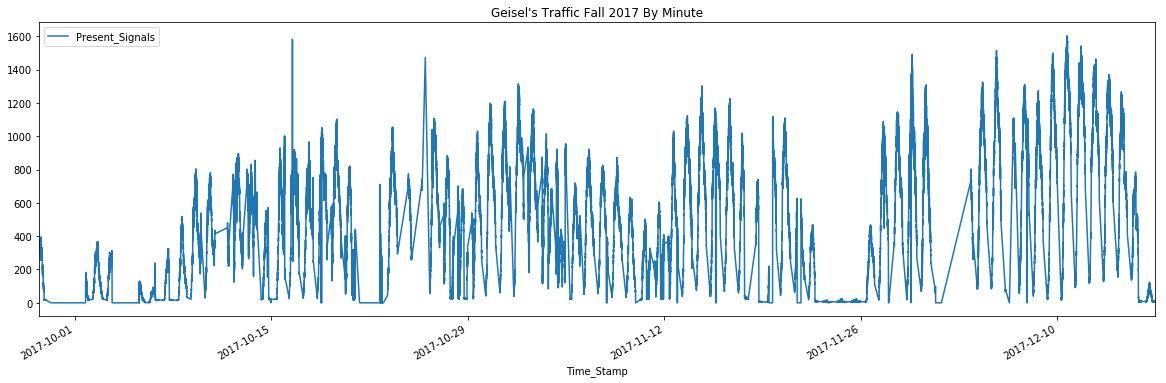

In [16]:
ax = df_geisel_fall.plot()
_ = ax.set_title("Geisel's Traffic Fall 2017 By Minute")

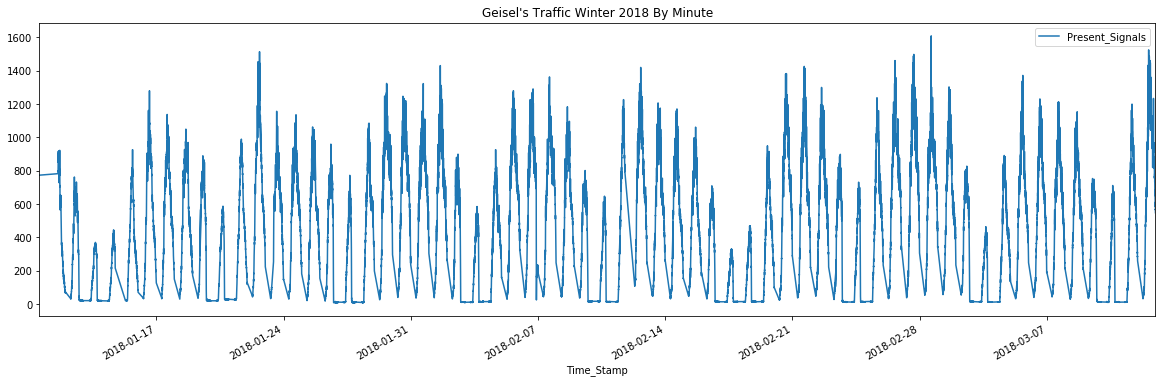

In [17]:
ax = df_geisel_winter.plot()
_ = ax.set_title("Geisel's Traffic Winter 2018 By Minute")

We see here for both quarters that there are spikes in activity during the week day and drops down during weekends and holidays.

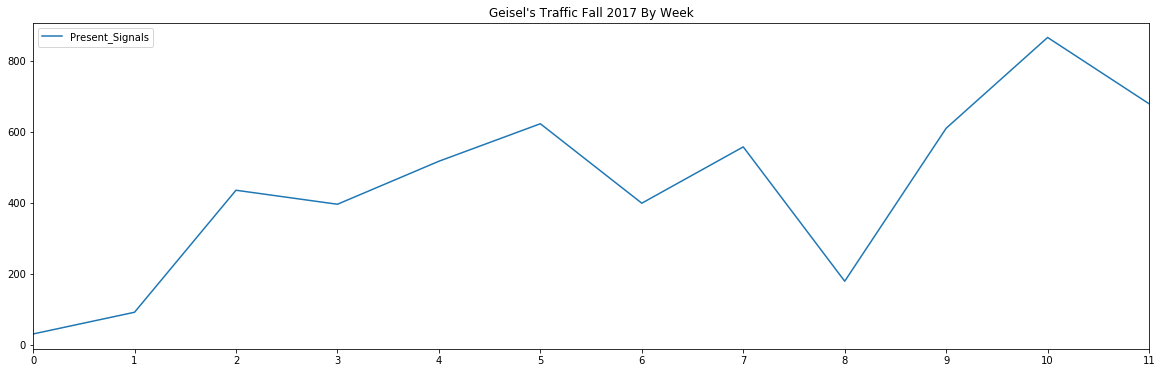

In [18]:
df_week_fall = df_geisel_fall.resample('W').mean()
df_week_fall.index = [week for week in range(len(df_week_fall))]
ax = df_week_fall.plot()
plt.xticks(df_week_fall.index)
_ = ax.set_title("Geisel's Traffic Fall 2017 By Week")

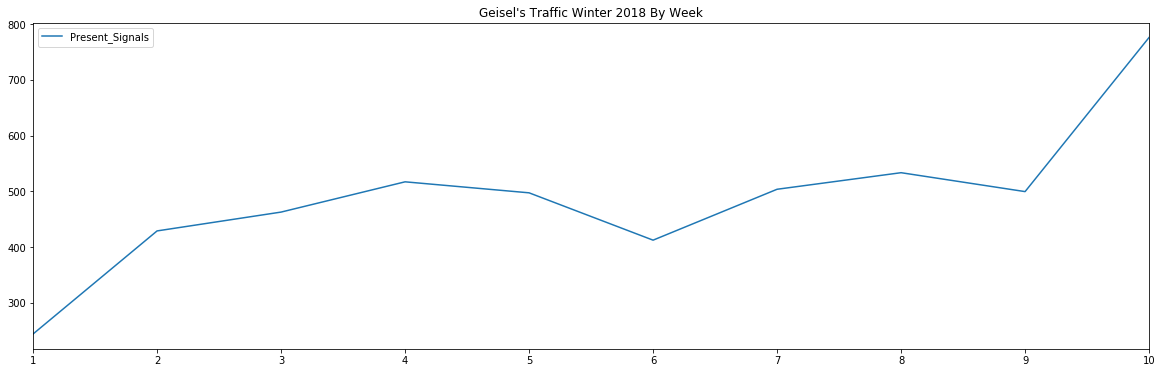

In [19]:
df_week_winter = df_geisel_winter.resample('W').mean()
df_week_winter.index = [week for week in range(1, len(df_week_winter)+1)]
ax = df_week_winter.plot()
plt.xticks(df_week_winter.index)
_ = ax.set_title("Geisel's Traffic Winter 2018 By Week")

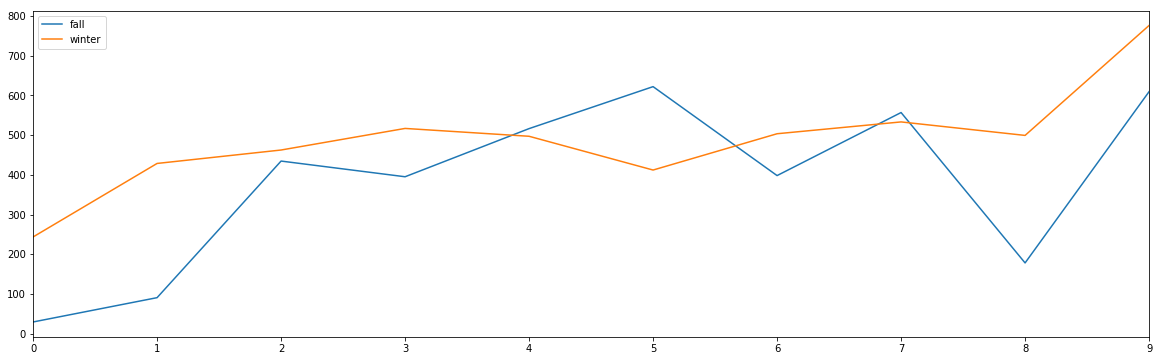

In [20]:
X = [week for week in range(len(df_week_winter))]
fall_weeks = list(df_week_fall['Present_Signals'][:len(df_week_winter.values)])
winter_weeks = list(df_week_winter['Present_Signals'])
week_cmp_df = pd.DataFrame({'fall': fall_weeks, 'winter': winter_weeks}, index=X)
plt.figure(); week_cmp_df.plot();

We see that during midterms and finals, the amount of people in Geisel increases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8fbb2f28>]], dtype=object)

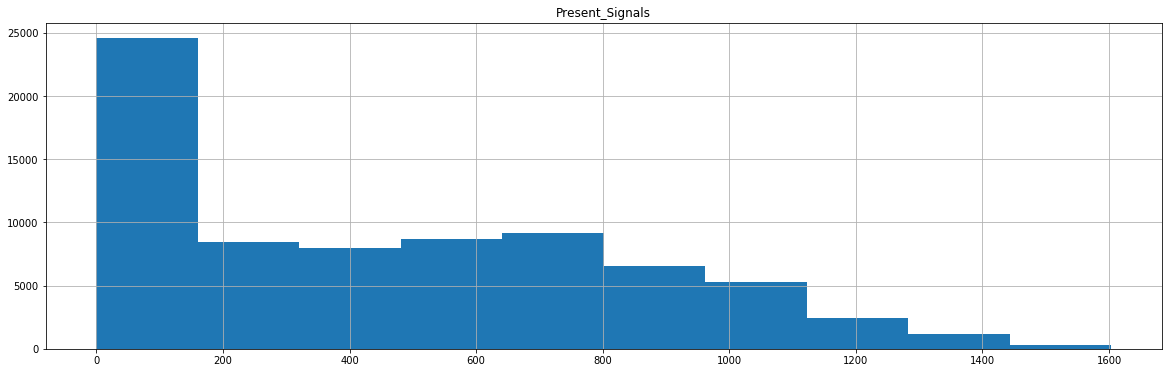

In [21]:
df_geisel_fall.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8f569048>]], dtype=object)

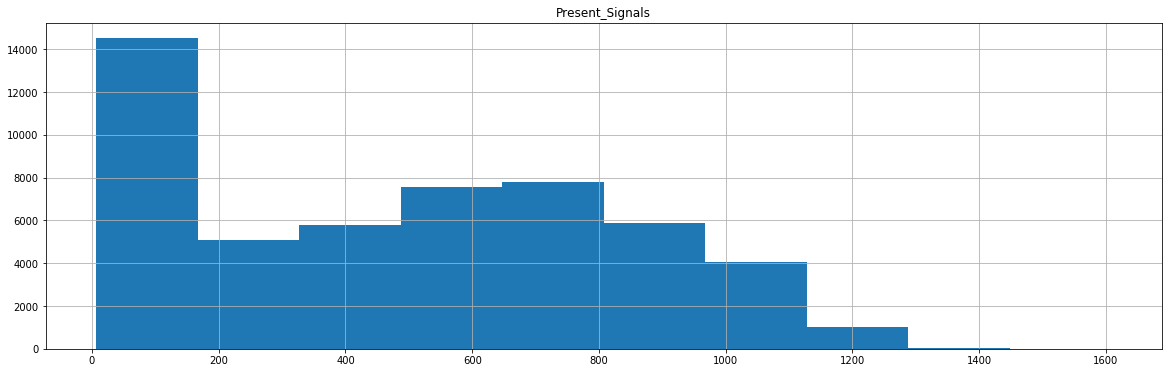

In [22]:
df_geisel_winter.hist()

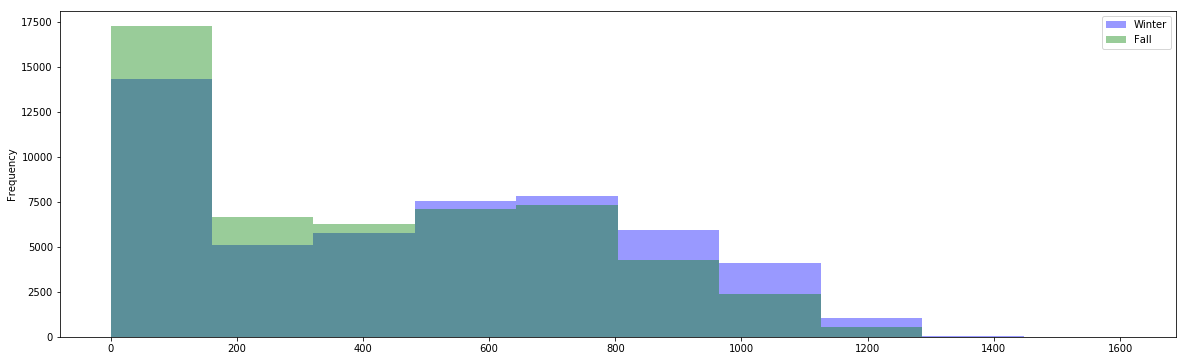

In [23]:
df_days = pd.DataFrame(list(df_geisel_winter['Present_Signals']), columns=['Winter'])
df_days['Fall'] = list(df_geisel_fall['Present_Signals'])[:len(df_days)]
plt.figure();
df_days.plot.hist(color=['blue', 'green'], alpha=0.4)

We visualize the frequency of signals throughout Geisel over time. There should be a signficant amount of low signals because during the night and most of the morning geisel has relatively few people. In other words, lower amounts of traffic is most common as Geisel there isn't as many people in Geisel during the night and early morning for most days.

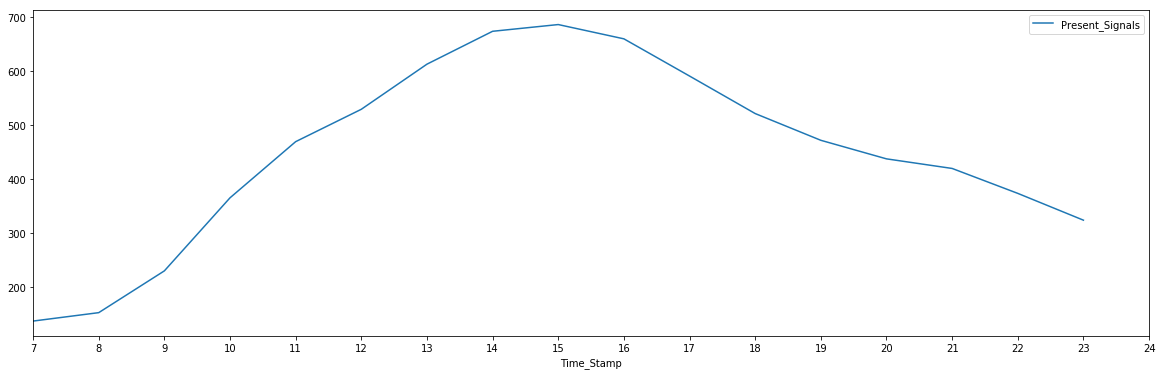

In [24]:
df_geisel_fall.groupby(df_geisel_fall.index.hour).mean().plot()
_ = plt.xticks([hour for hour in range(7, 25)])

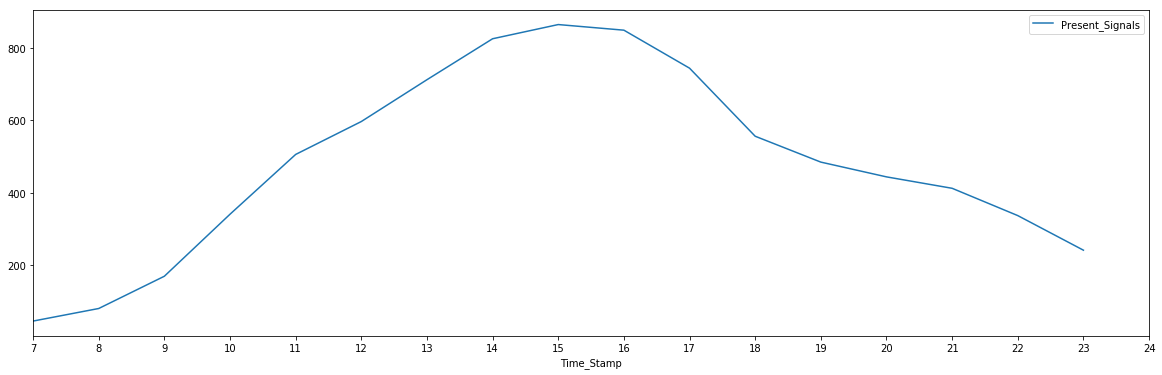

In [25]:
df_geisel_winter.groupby(df_geisel_winter.index.hour).mean().plot()
_ = plt.xticks([hour for hour in range(7, 25)])

Peak hours during Geisel are from 2 PM to 4 PM.

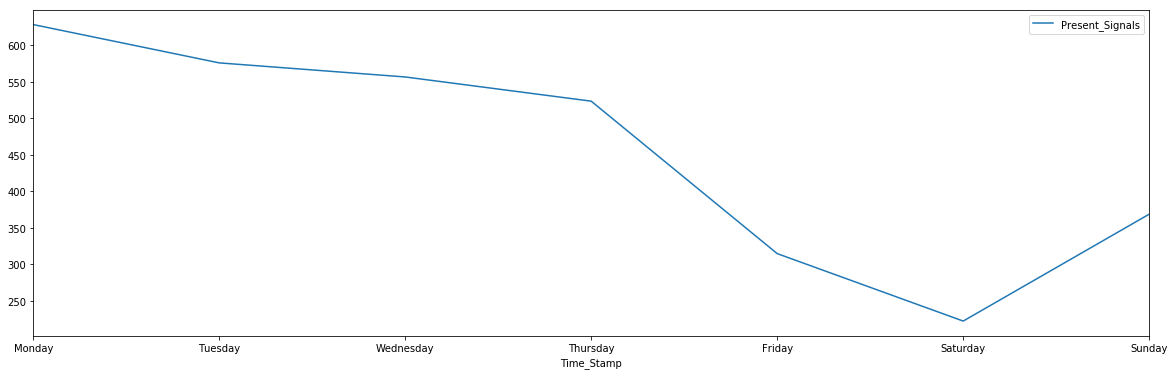

In [26]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean().plot()
_ = ax.set_xticklabels(days_of_week)

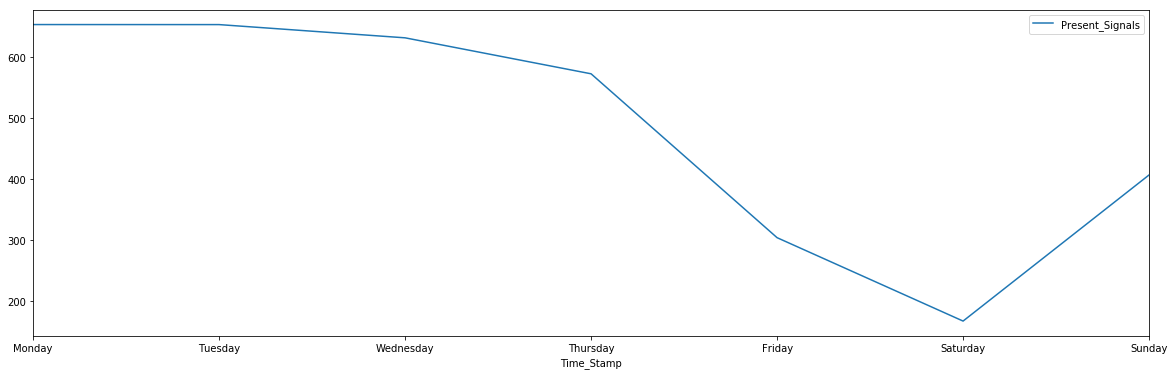

In [27]:
ax = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean().plot()
_ = ax.set_xticklabels(days_of_week)

The beginning of the week has more people in Geisel than towards the end of the week.

#### Schedule of Classes

Here we show the graphs that illustrate the class schedule data for each day of the week. The y-axis represents the number of people in class during each 5-minute period throughout the day. And the ticks for x-axis represents the start or end of each 5-minute period. The resulting graphs look similar to histograms. There are some some suddens because of the 10-minutes grace periods between classes that allow students to walk to another class after a class ends. We can also observe that Monday/Wednesday/Friday class schedule has different class time comparing to Tusday/Friday. 

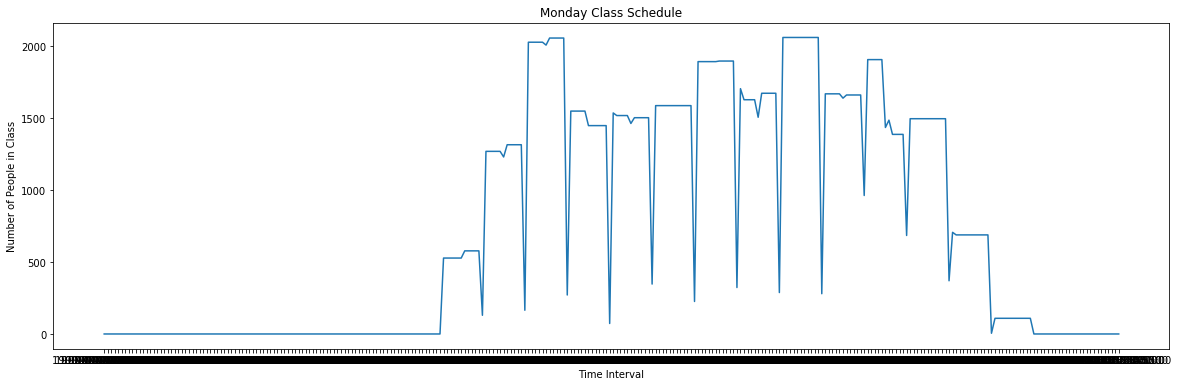

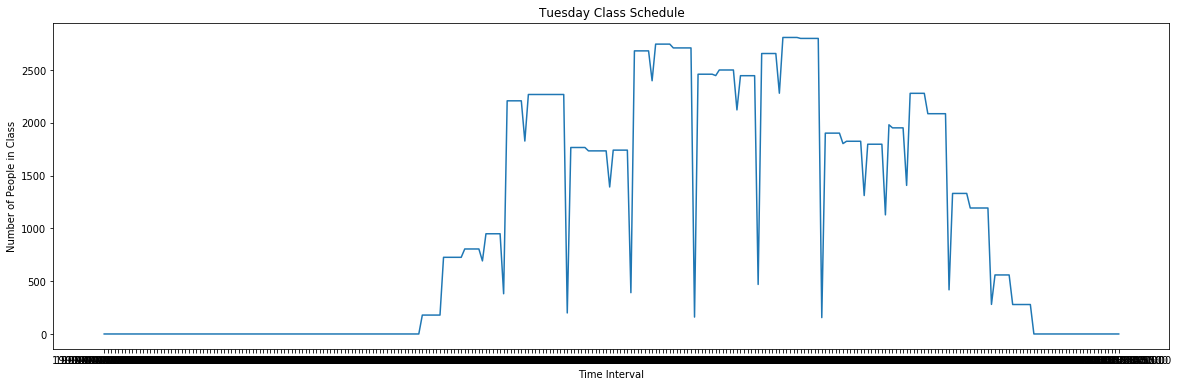

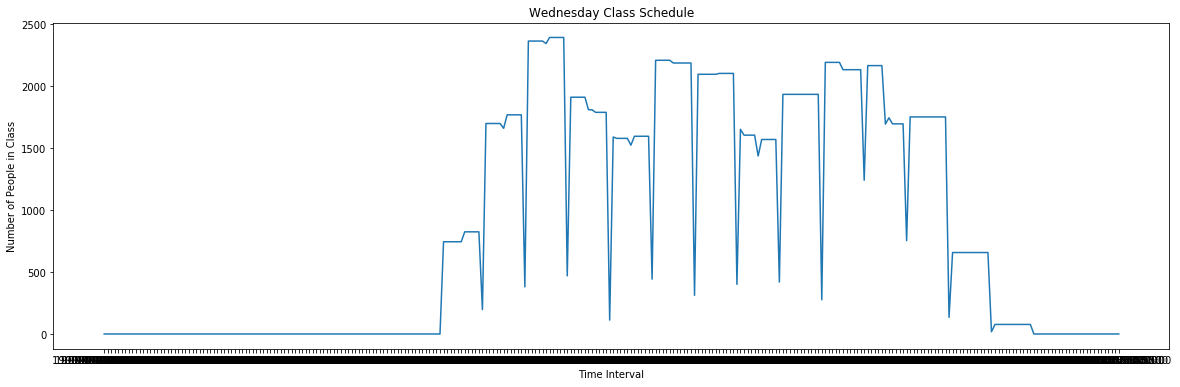

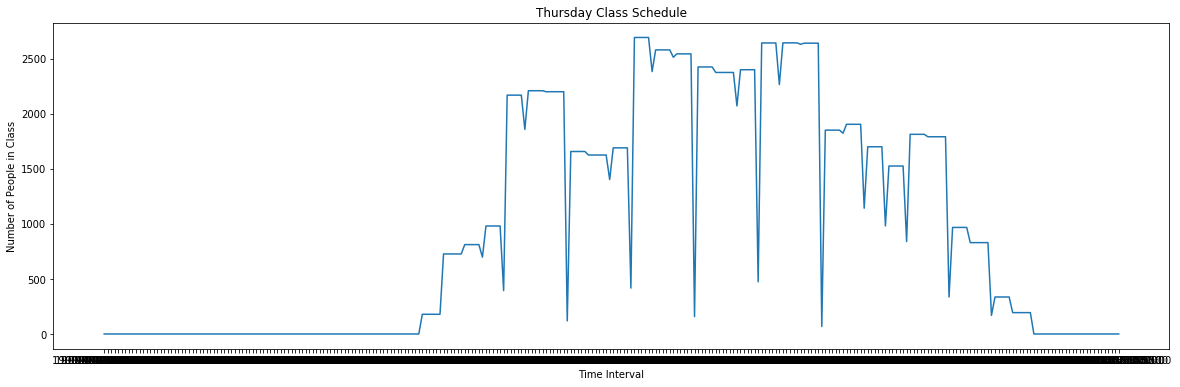

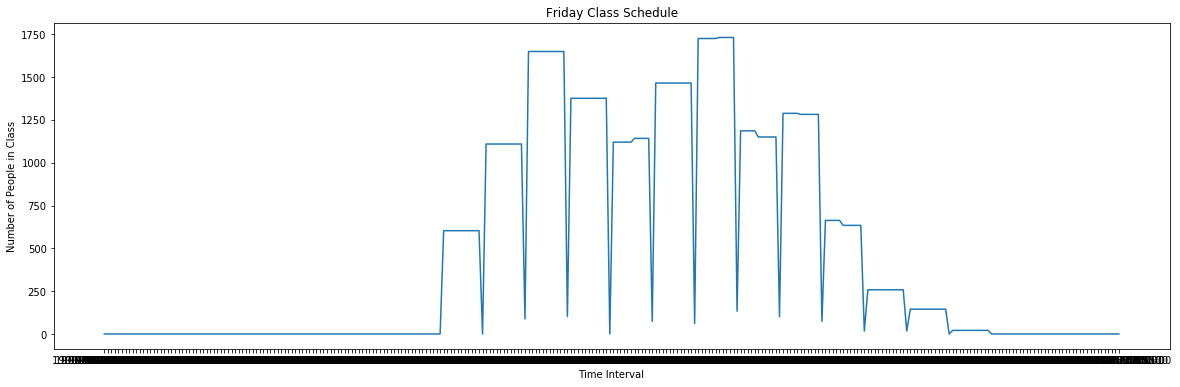

In [36]:
# Firstly, we load the processed csv files into data frames.
monday_class_schedule_df = pd.read_csv('data/monday_class_schedule.csv')
tuesday_class_schedule_df = pd.read_csv('data/tuesday_class_schedule.csv')
wednesday_class_schedule_df = pd.read_csv('data/wednesday_class_schedule.csv')
thursday_class_schedule_df = pd.read_csv('data/thursday_class_schedule.csv')
friday_class_schedule_df = pd.read_csv('data/friday_class_schedule.csv')

# Then we plot them for each day of the week
plt.plot(monday_class_schedule_df['Time_Stamp'], monday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Monday Class Schedule')
plt.show()

plt.plot(tuesday_class_schedule_df['Time_Stamp'], tuesday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Tuesday Class Schedule')
plt.show()

plt.plot(wednesday_class_schedule_df['Time_Stamp'], wednesday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Wednesday Class Schedule')
plt.show()

plt.plot(thursday_class_schedule_df['Time_Stamp'], thursday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Thursday Class Schedule')
plt.show()

plt.plot(friday_class_schedule_df['Time_Stamp'], friday_class_schedule_df['Number_of_People'])
plt.ylabel('Number of People in Class')
plt.xlabel('Time Interval')
plt.title('Friday Class Schedule')
plt.show()

After we visualize the schedule data, we will visualize the Geisel Library's foot traffic data in the same way, in which we will show average singal data for each day of the week. And finally we overlay all of the days, i.e., from Monday to Friday, into a single graph, so we can illustrate the difference between each day for the signal data. Notice that y-axis of these graphs represent the sum of present signal for all floors at Geisel Library. And the x-axis is same as the graphs for schedule data above, i.e., each tick represents start/end of a 5-minute period. One interesting observation we can see is that students are laziest on Friday and are most hardworking on Monday based on the graphs. And the graphs are shown below: 

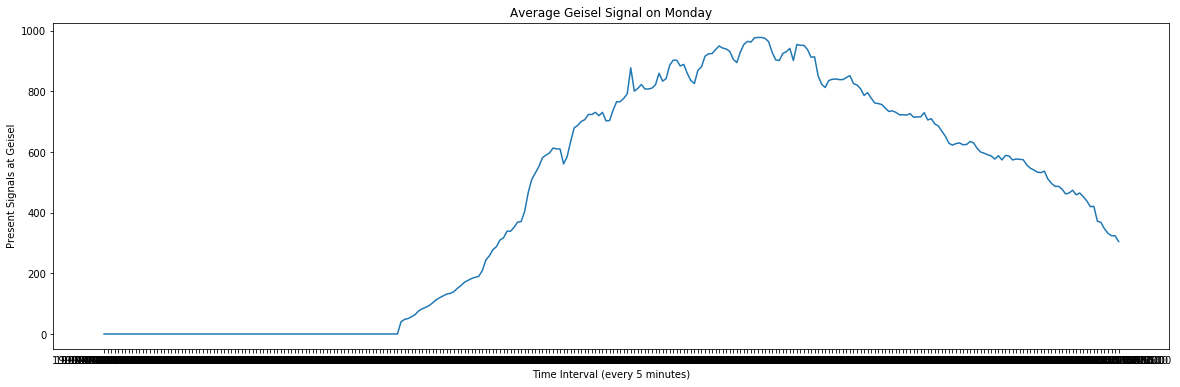

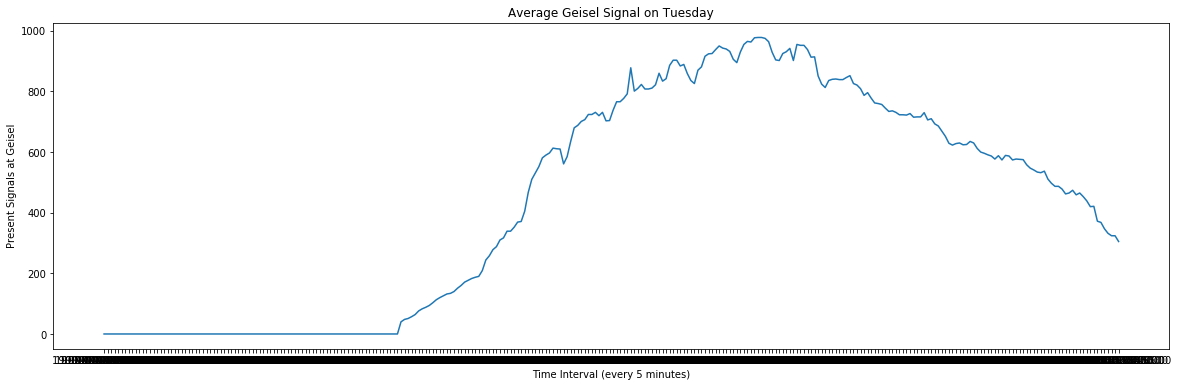

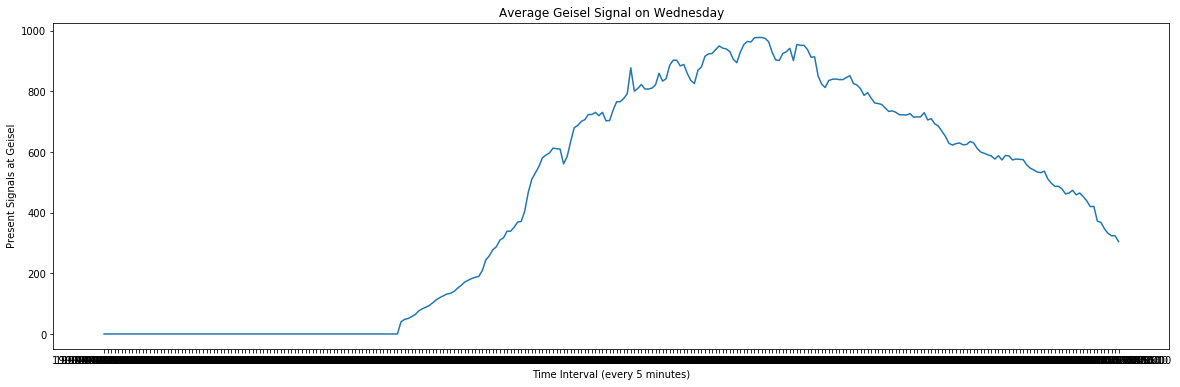

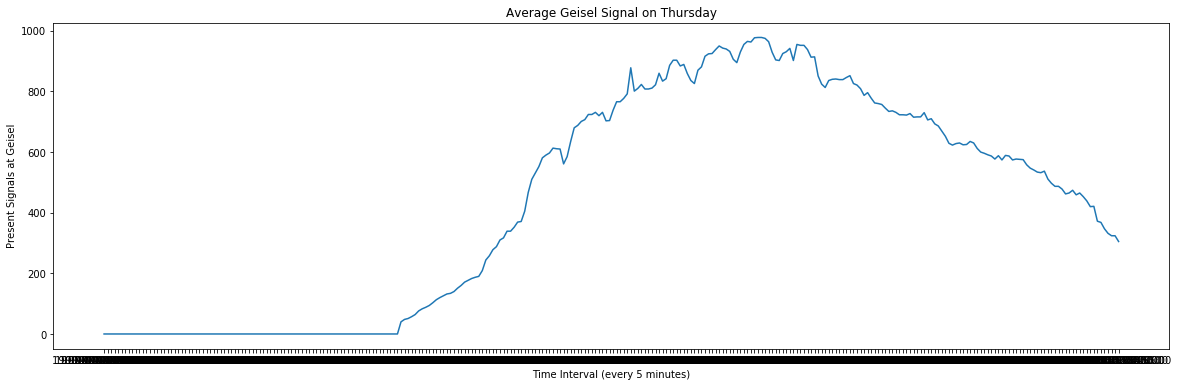

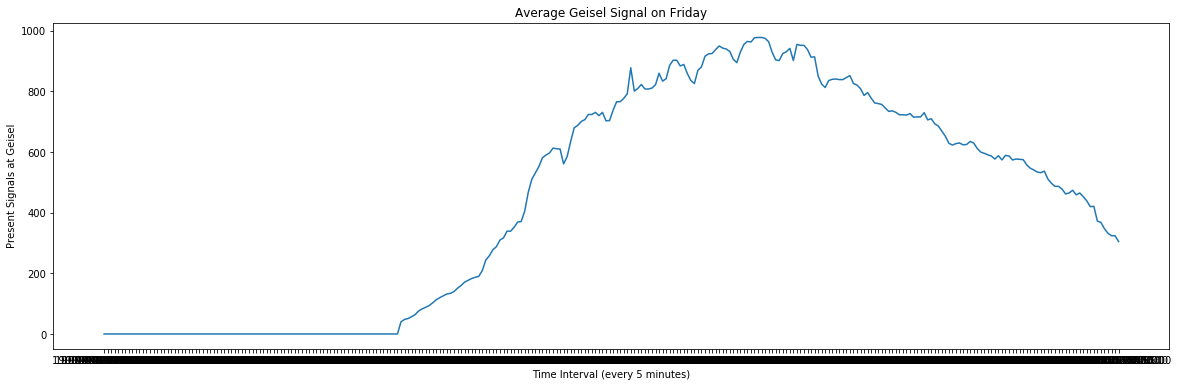

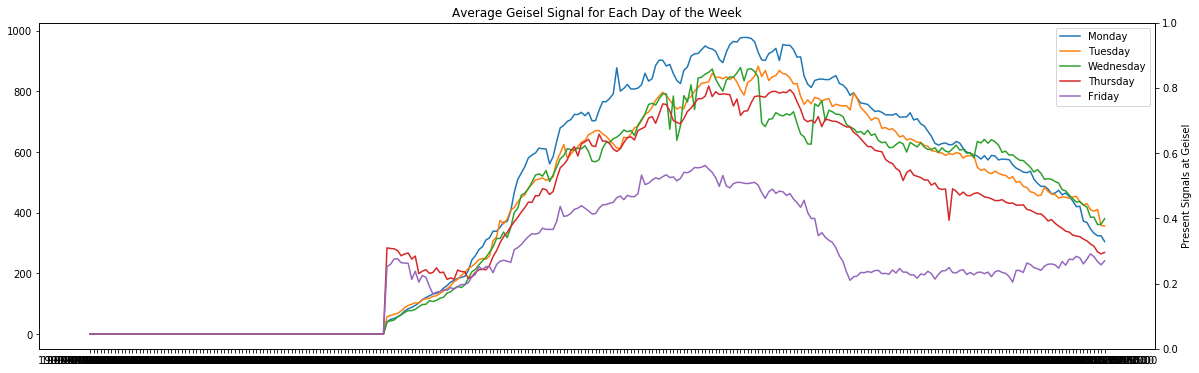

In [38]:
# Firstly, we load the processed csv files into dataframes 
monday_geisel_average_df = pd.read_csv('data/geisel_monday_average_2017.csv')
tuesday_geisel_average_df = pd.read_csv('data/geisel_tuesday_average_2017.csv')
wednesday_geisel_average_df = pd.read_csv('data/geisel_wednesday_average_2017.csv')
thursday_geisel_average_df = pd.read_csv('data/geisel_thursday_average_2017.csv')
friday_geisel_average_df = pd.read_csv('data/geisel_friday_average_2017.csv')

# Then we output graphs for geisel singal data for each day of the week 
plt.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(tuesday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Tuesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(wednesday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Wednesday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(thursday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Thursday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()
plt.plot(friday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'])
plt.title('Average Geisel Signal on Friday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

# Finally, we overlay all of these graphs into one single graph to illustrate the differences
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(monday_geisel_average_df['Time_Stamp'], monday_geisel_average_df['Present_Signals'], label='Monday')
ax1.plot(tuesday_geisel_average_df['Time_Stamp'], tuesday_geisel_average_df['Present_Signals'], label='Tuesday')
ax1.plot(wednesday_geisel_average_df['Time_Stamp'], wednesday_geisel_average_df['Present_Signals'], label='Wednesday')
ax1.plot(thursday_geisel_average_df['Time_Stamp'], thursday_geisel_average_df['Present_Signals'], label='Thursday')
ax1.plot(friday_geisel_average_df['Time_Stamp'], friday_geisel_average_df['Present_Signals'], label='Friday')
ax1.legend()
plt.title('Average Geisel Signal for Each Day of the Week')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Present Signals at Geisel')
plt.show()

After we have shown the graphs for class schedule data and Geisel Library's signal data, we can now overlay schedule data with signal data to observe their relationship. The y-axis of these graphs represent present signal data at Geisel Library and number of people in class at the same time. And the ticks in the x-axis represent the start/end for each 5-minutes period. There are two main observations we can make from these graphs. The first observation is that as the number of people in classes increase throughout the day, signal data also increases, and vice versa. The second observation is that there are some sudden drops in the signal data during the grace periods between classes. We have 

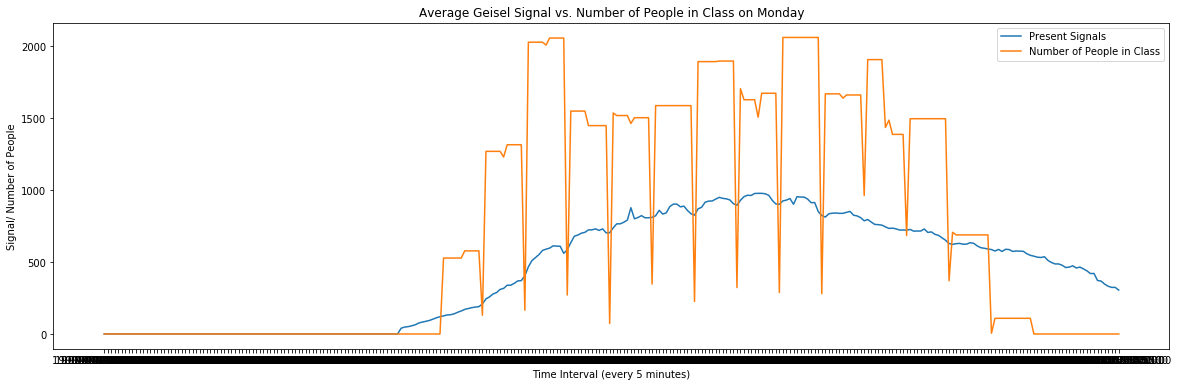

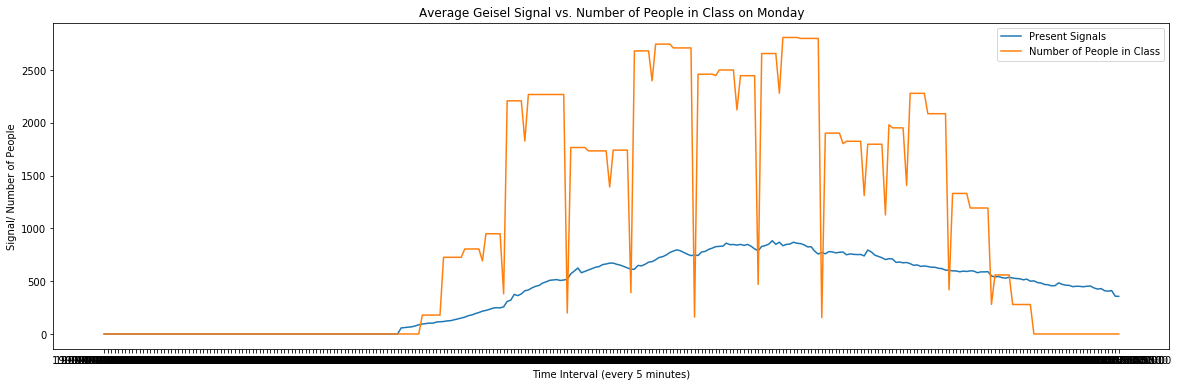

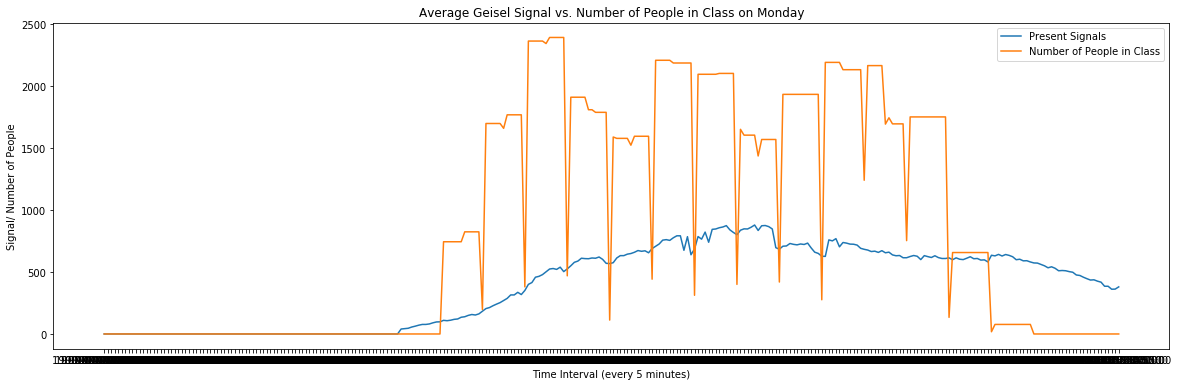

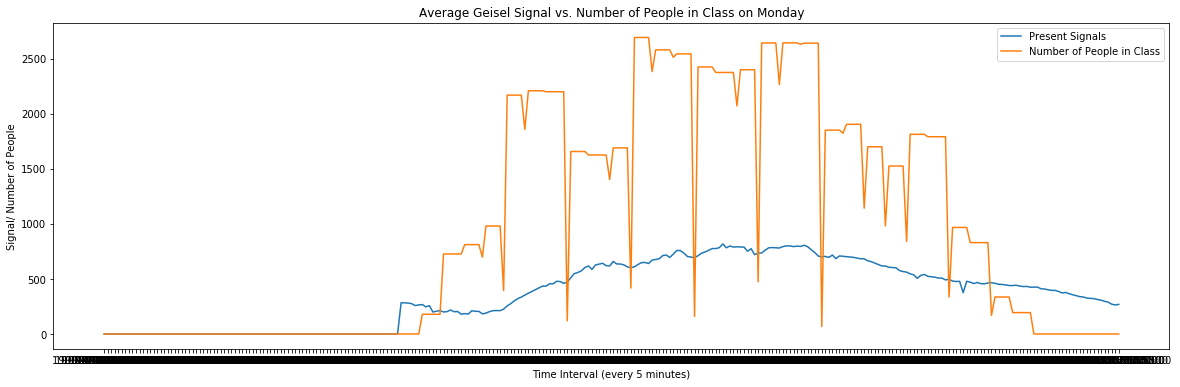

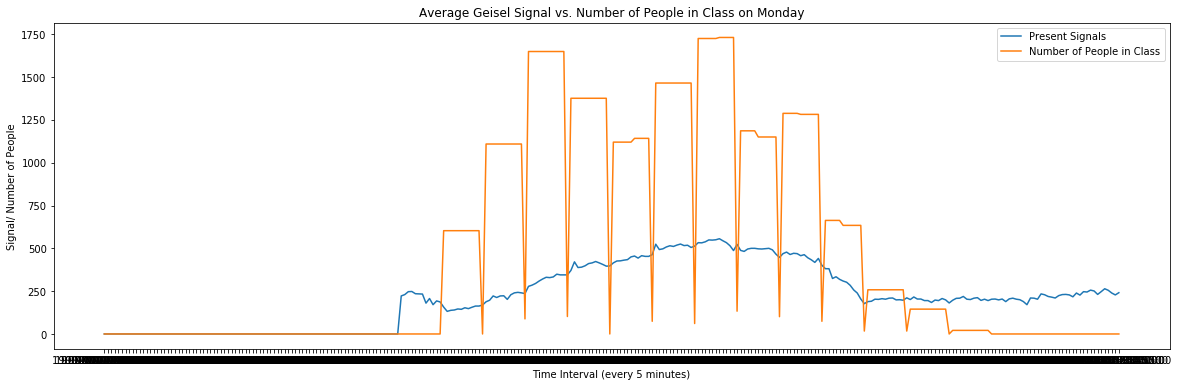

In [41]:
overlay_df_m = pd.merge(monday_geisel_average_df, monday_class_schedule_df, on='Time_Stamp')
overlay_df_t = pd.merge(tuesday_geisel_average_df, tuesday_class_schedule_df, on='Time_Stamp')
overlay_df_w = pd.merge(wednesday_geisel_average_df, wednesday_class_schedule_df, on='Time_Stamp')
overlay_df_r = pd.merge(thursday_geisel_average_df, thursday_class_schedule_df, on='Time_Stamp')
overlay_df_f = pd.merge(friday_geisel_average_df, friday_class_schedule_df, on='Time_Stamp')

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_m['Time_Stamp'], overlay_df_m['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_m['Time_Stamp'], overlay_df_m['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_t['Time_Stamp'], overlay_df_t['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_t['Time_Stamp'], overlay_df_t['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_w['Time_Stamp'], overlay_df_w['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_w['Time_Stamp'], overlay_df_w['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_r['Time_Stamp'], overlay_df_r['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_r['Time_Stamp'], overlay_df_r['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(overlay_df_f['Time_Stamp'], overlay_df_f['Present_Signals'], label='Present Signals')
ax1.plot(overlay_df_f['Time_Stamp'], overlay_df_f['Number_of_People'], label='Number of People in Class')
ax1.legend()
plt.title('Average Geisel Signal vs. Number of People in Class on Monday')
plt.xlabel('Time Interval (every 5 minutes)')
plt.ylabel('Signal/ Number of People')
plt.show()

### Weather

#### Fall Quarter 2017

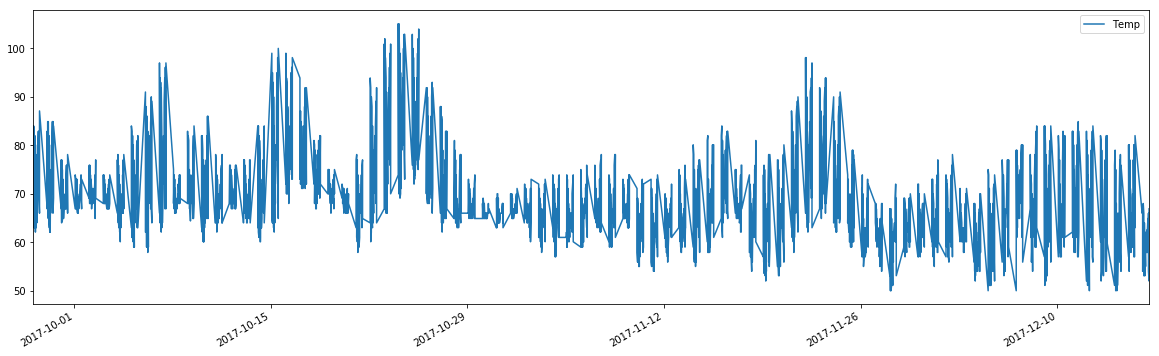

In [38]:
df_weather_2017.plot()

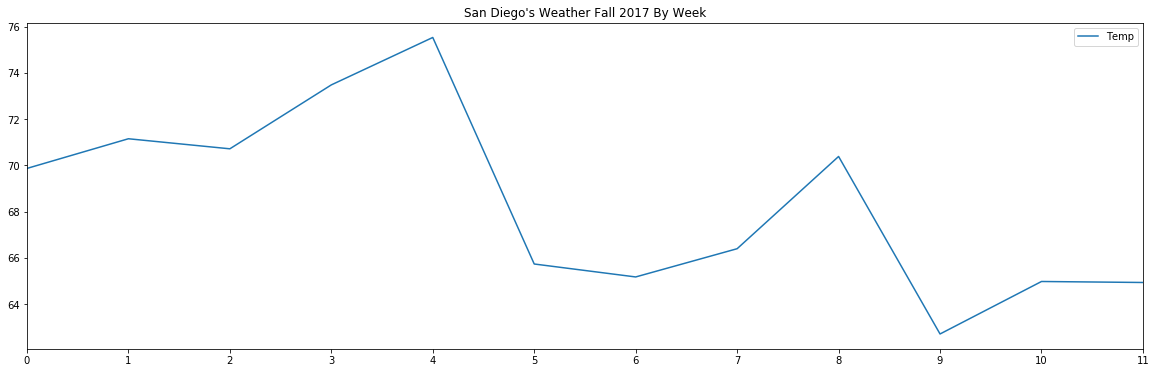

In [47]:
df_weather_week = df_weather_2017.resample('W').mean()
df_weather_week.index = [week for week in range(len(df_weather_week))]
ax = df_weather_week.plot()
plt.xticks(df_weather_week.index)
_ = ax.set_title("San Diego's Weather Fall 2017 By Week")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8f179ac8>]], dtype=object)

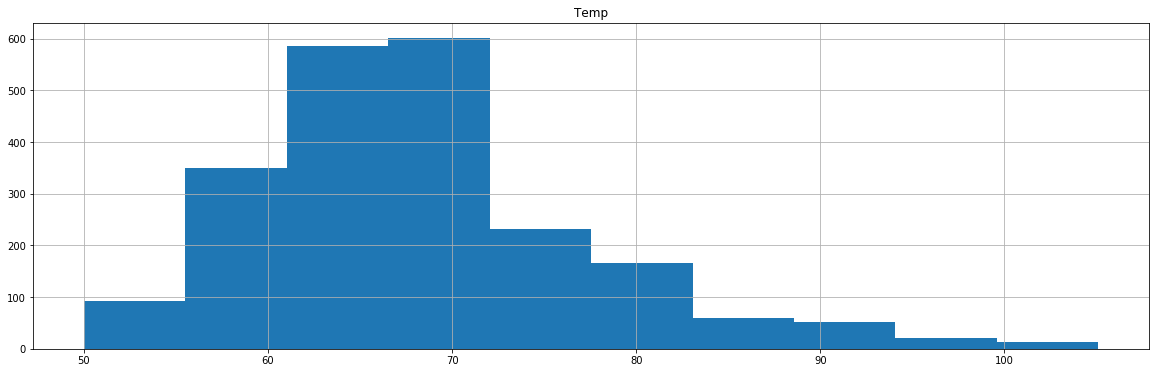

In [40]:
df_weather_2017.hist()

Here, we see that weather averages around 70 degrees.

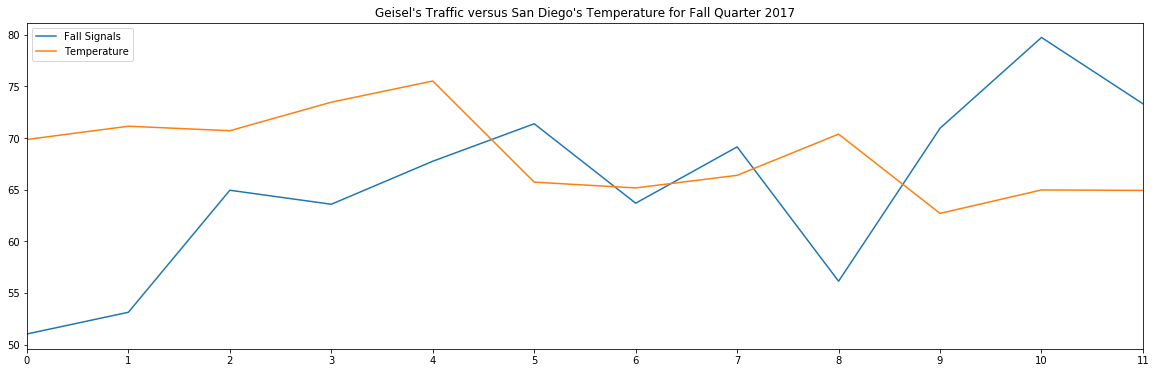

In [48]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

X = [week for week in range(len(df_weather_week))]
min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_temp, max_temp = df_weather_2017['Temp'].min(), df_weather_2017['Temp'].max()
fall_weeks = list(df_week_fall['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_temp, max_temp)))
weather_weeks = list(df_weather_week['Temp'])
week_cmp_df = pd.DataFrame({'Fall Signals': fall_weeks, 'Temperature': weather_weeks}, index=X)
plt.figure(); ax = week_cmp_df.plot();
plt.xticks([week for week in range(12)]); ax.set_title("Geisel's Traffic versus San Diego's Temperature for Fall Quarter 2017");

There is no obvious trends between Geisel's signals and temperature.

#### Winter Quarter 2018

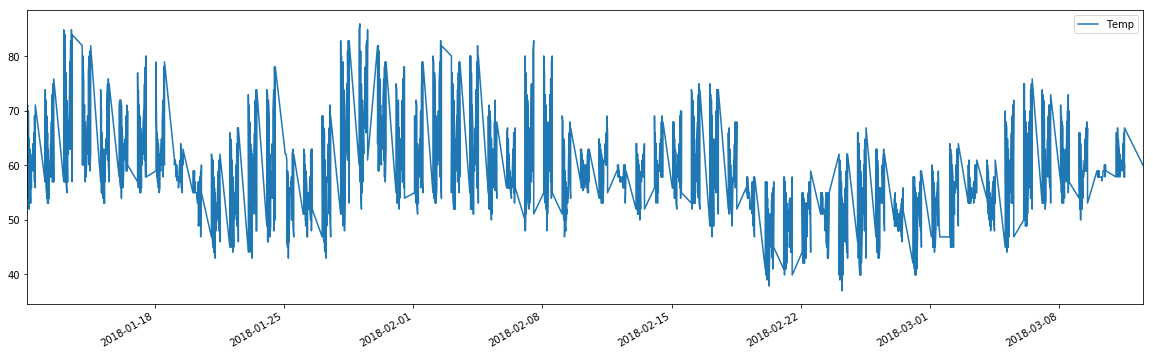

In [42]:
df_weather_2018.plot()

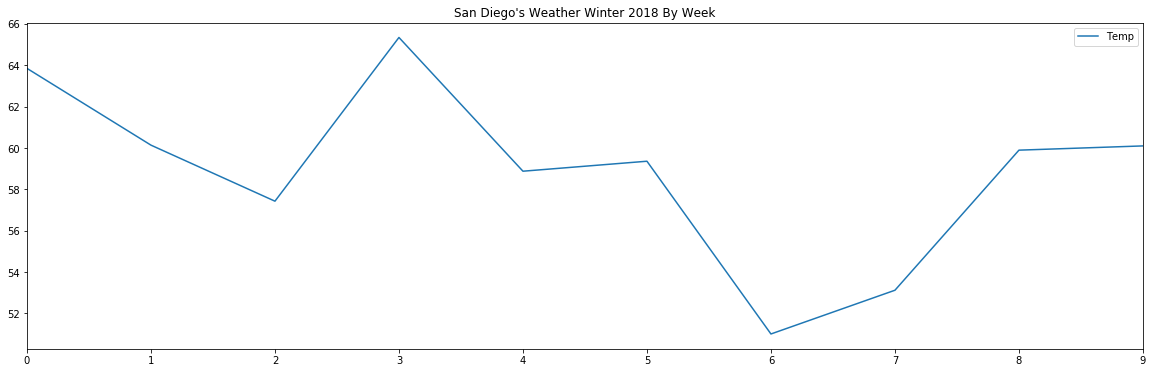

In [51]:
df_weather_week = df_weather_2018.resample('W').mean()
df_weather_week.index = [week for week in range(len(df_weather_week))]
ax = df_weather_week.plot()
plt.xticks(df_weather_week.index)
_ = ax.set_title("San Diego's Weather Winter 2018 By Week")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8c4a15c0>]], dtype=object)

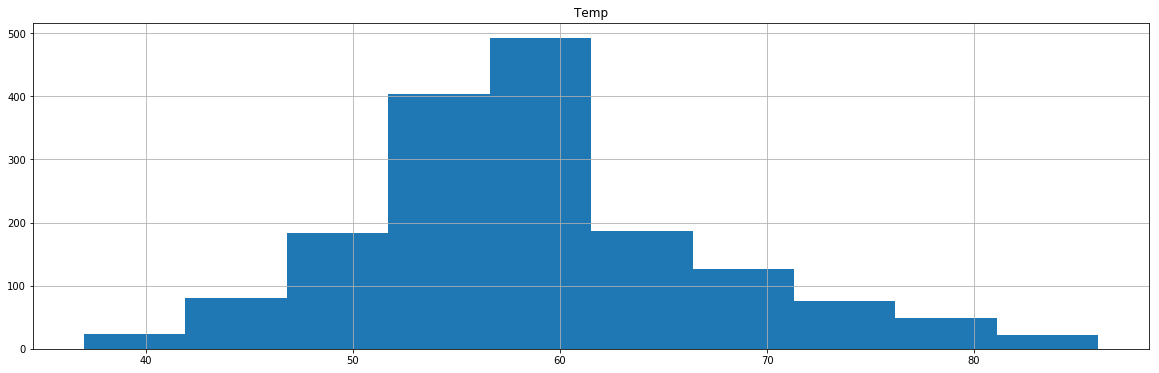

In [52]:
df_weather_2018.hist()

Here, we see that the temperature averages around 60 degrees for the winter quarter which is 10 degrees less than the fall quarter's temperature.

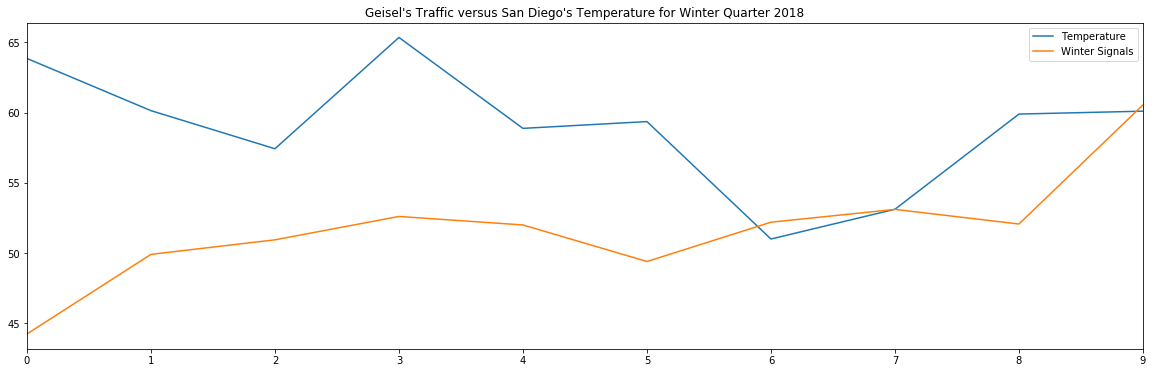

In [60]:
X = [week for week in range(len(df_weather_week))]
min_signals, max_signals = df_geisel_winter['Present_Signals'].min(), df_geisel_winter['Present_Signals'].max()
min_temp, max_temp = df_weather_2018['Temp'].min(), df_weather_2018['Temp'].max()
winter_weeks = list(df_week_winter['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_temp, max_temp)))
weather_weeks = list(df_weather_week['Temp'])
week_cmp_df = pd.DataFrame({'Winter Signals': winter_weeks, 'Temperature': weather_weeks}, index=X)
plt.figure(); ax = week_cmp_df.plot();
plt.xticks([week for week in range(10)]); ax.set_title("Geisel's Traffic versus San Diego's Temperature for Winter Quarter 2018");

There is no obvious trends between Geisel's signals and temperature.

### Shuttle

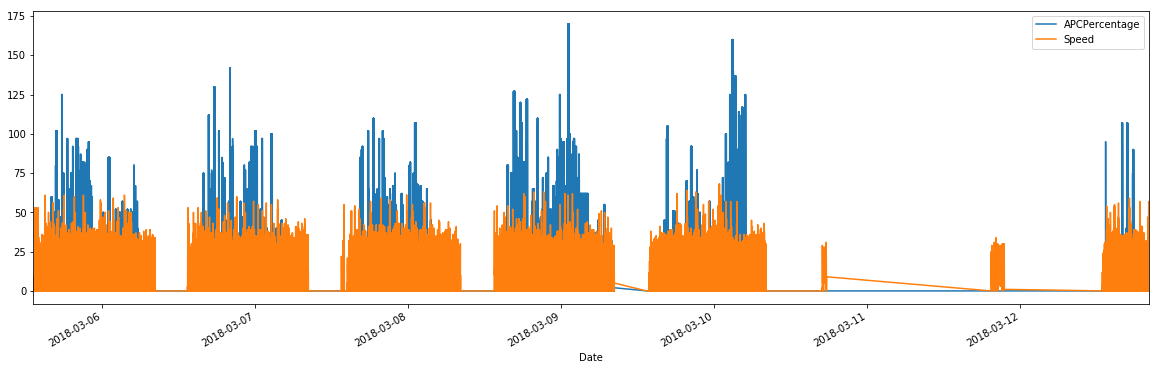

In [29]:
df_shuttle.plot()

Here we see that the shuttle is parked at night indicated by the horizontal lines at 0 and it starts getting people during normal service hours.

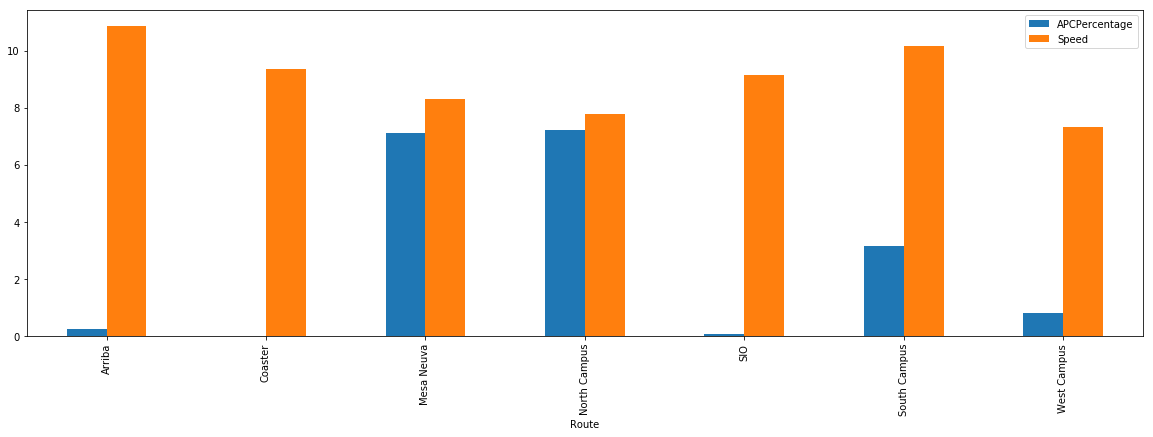

In [30]:
df_shuttle.groupby('Route').mean().plot(kind='bar')

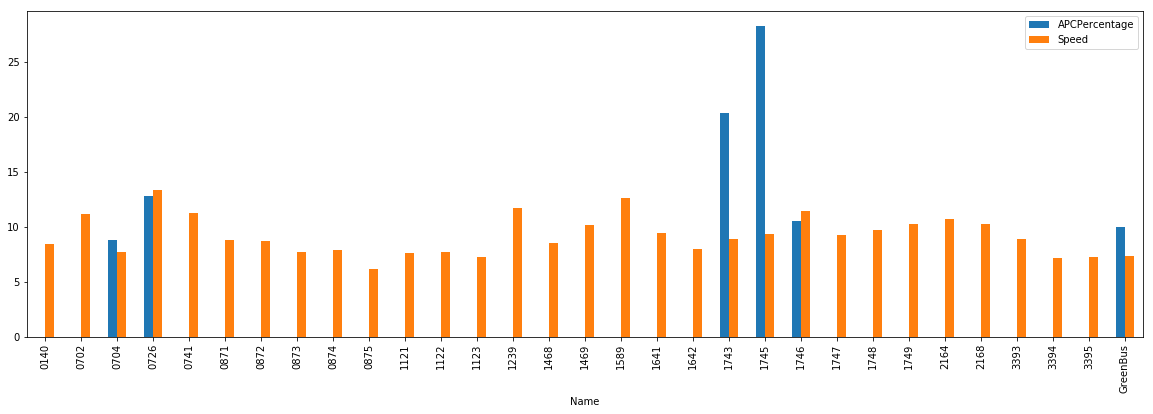

In [31]:
df_shuttle.groupby('Name').mean().plot(kind='bar')

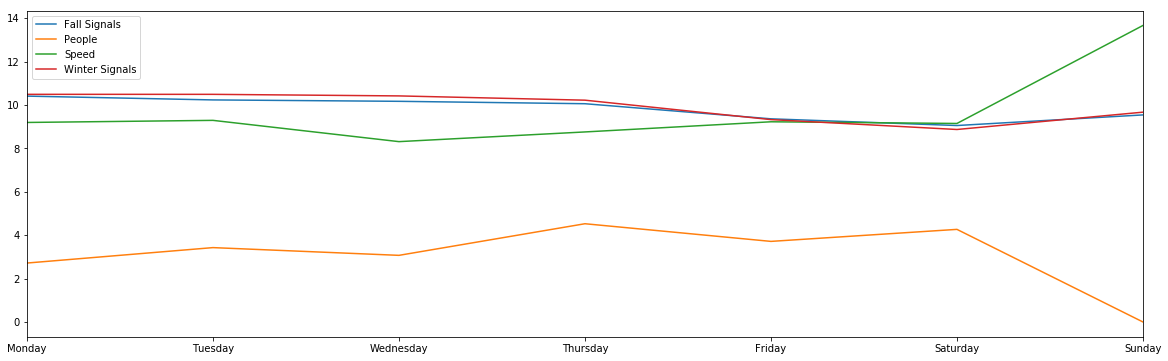

In [32]:
shuttle_weekday = df_shuttle.groupby(df_shuttle.index.weekday).mean()
fall_weekday = df_geisel_fall.groupby(df_geisel_fall.index.weekday).mean()
winter_weekday = df_geisel_winter.groupby(df_geisel_winter.index.weekday).mean()

min_signals, max_signals = df_geisel_fall['Present_Signals'].min(), df_geisel_fall['Present_Signals'].max()
min_speed, max_speed = shuttle_weekday['Speed'].min(), shuttle_weekday['Speed'].max()

weekday_cmp_df = pd.DataFrame({
    'Fall Signals': fall_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Winter Signals': winter_weekday['Present_Signals'].apply(lambda x: translate(x, min_signals, max_signals, min_speed, max_speed)),
    'Speed': shuttle_weekday['Speed'],
    'People': shuttle_weekday['APCPercentage']
})
plt.figure(); ax = weekday_cmp_df.plot(); ax.set_xticklabels(days_of_week);

# Data Analysis (Continue):

### Correlation Coefficient 

### Geisel vs. Weather

In [61]:
from scipy.stats import pearsonr

In [64]:
df_combine = df_weather_2017.resample('W').mean().join(df_geisel_fall.resample('W').mean())
df_combine

,Temp,Present_Signals
2017-10-01,69.864615,29.722403
2017-10-08,71.147594,90.934017
2017-10-15,70.712887,434.833520
2017-10-22,73.476882,395.340297
2017-10-29,75.528141,516.549648
2017-11-05,65.730769,622.222473
2017-11-12,65.170879,398.301541
2017-11-19,66.391979,557.020532
2017-11-26,70.381461,178.407091
2017-12-03,62.704615,609.572420


This data compares the temperature and present signals of every 7 days of the quarter (weekly).  

In [65]:
pearsonr(df_combine['Present_Signals'], df_combine['Temp'])

(-0.51637917554570045, 0.08565168025333636)

As shown above, there seems to be a negative correlation coefficient between the Present_Signals and Temperature. This means that, as the temperature increases, less people tend to stay in the library. Also, when the temperature gets colder, it would be likely that more people will be attending Geisel.

In [66]:
df_combine = df_weather_2018.resample('W').mean().join(df_geisel_winter.resample('W').mean())
df_combine

,Temp,Present_Signals
2018-01-14,63.850926,243.774786
2018-01-21,60.137624,428.837800
2018-01-28,57.427011,462.659125
2018-02-04,65.344910,517.002807
2018-02-11,58.876856,497.246050
2018-02-18,59.359259,412.245477
2018-02-25,51.004678,503.636590
2018-03-04,53.120103,533.384332
2018-03-11,59.894737,499.438835
2018-03-18,60.100000,776.232510


In [67]:
pearsonr(df_combine['Present_Signals'], df_combine['Temp'])

(-0.21902227203317756, 0.54321814623032805)

### Geisel vs. Schedule Data 

In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr

df_geisel_monday = pd.read_csv("data/geisel_monday_average_2017.csv")
df_schedule_monday = pd.read_csv("data/monday_class_schedule.csv")

pearsonr(df_geisel_monday["Present_Signals"], df_schedule_monday["Number_of_People"])

(0.8092616386522097, 4.895925668108242e-68)

As shown above, there is a strong positive correlation coefficient between the number of people in geisel and the number of people in class. From this, we can infer that when there are people leaving class, there are probably people leaving Geisel to go to their next section of class. 

### Geisel vs. Shuttle Data

In [4]:
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr

df_geisel = pd.read_csv('data/geisel_Winter2018.csv')
df_geisel.index = pd.to_datetime(df_geisel['Time_Stamp'])
df_geisel = df_geisel['Present_Signals']
df_geisel.tail(10)
df_combine = df_shuttle.resample('T').mean().join(df_geisel.resample('T').mean())
df_combine = df_combine.dropna()
df_combine

pearsonr(df_combine["Present_Signals"], df_combine["APCPercentage"])

(-0.038639736045646786, 0.013203161544640688)

There seems to be no relationship between the number of people in geisel and the number of people at the shuttle.

# Ethics and Privacy

Waitz gave us permission to access the data on how populated Geisel is. For the purpose of the final project, Waitz gave us the opportunity to work with their company as interns to use their information for analysis purposes. The documents are PROPRIETARY INFORMATION AND INVENTION ASSIGNMENT AGREEMENT (PIAA) and INTERN OFFER letter.

For the weather data, this data is public information and is available to everyone.

The shuttle data was scraped through the UCSD live map site, which is available online. For individual privacy, this information does not disclose who is on the bus. It only reveals the capacity rate of the shuttle at a given time.

And for the scheduling dataset, the information was scraped from the UCSD course schedule website. Since this website measured the number of students taking classes at a certain period of time, the data will be fairly accurate. 
There is no specific information on individual taking any courses. This data only measures the number of people in a course.

### Bias

**Waitz Dataset**

There is bias towards the location of the hardware hubs and towards students with electronics with built-in Bluetooth capabilities. Placing hubs at certain locations of the library may not receive signals from students at other parts of the library. And since there are students without a built-in Bluetooth towards their electronic devices, this may cause an underestimate. Likewise, there may be an overestimate if there are students with multiple Bluetooth devices.

**Weather Dataset**

For the weather data, there doesn't seem to be any biases in this data set because temperature is typically recorded accurately. 

**Schedule Dataset**

In terms of the class time, there will be a bias towards students who don't attend class. Because of this, there may be an overestimate on the number of people that probably have to leave for class during a period of time. Also, this data doesn't measure the number of students during finals week.

**Shuttle Dataset**

For this dataset, bias is very unlikely in the shuttle data because of the constant updates from the drivers and equipment inside the busses. Because of this, it also constantly measures the speed of the shuttle and the drivers count the number of people at the bus at a certain period of time. 

# Conclusion

From the data that was received, we have concluded on making the prediction model between the number of people at Geisel, the weather data, and the schedule data. The shuttle data was not placed into our prediction model because of its low relationship with the Geisel data (which had a rough correlation coefficient of -0.0386). From this, we were able to construct a prediction model. 


**Explain how the prediction model, once it has been built**

One pitfalls that have affected our interpretation of our data would be the different quarters for the weather data. In this case, the temperature in winter is generally lower than the temperature during the Spring time. However, the number of people in Geisel between both quarters are relatively the same. Because of this, our interpretation may cause us to believe that warmer weather has more people, if we use the data from Fall. 

Another pitfall would be how Fall quarter's signal may be larger than the actual value. We were warned that the the Fall quarter's data may overestimate the number of people because the 6th floor overcounted. This mat cause us to believe that there may have been a large number of people at Geisel at certain periods of the day, causing a slight skew in our data.

**From Project Proposal** (ERASE THIS SOON)

If our analyses and hypotheses are correct, then having a good prediction model for traffic at Gesiel will contribute towards our topic domain. To do this, this prediction model will use data on the number of people at a given location in the past, as well as certain external factors such as weather and class schedules. If our methods do not work and/or our hypotheses are wrong, then there might be many unmeasurable factors that contribute to how congested a place is. And if these methods don't work, then we'll be fairly confident that the dataset used aren't valid indicators of the traffic at UCSD Libraries. 

The potential pitfalls and potential confounds of your data and/or methods that may cause problems, and/or influence your interpretations is that the data could be a result of incorrect measurements by a hardware or firmware malfunction. The methods we use may be too simplistic and required a more sophisticated model for a more accurate result. Also, having no relationship between the dataset may cause us to change the type of data used to make an accurate prediction. 